# Chicago Traffic Crash Analysis

## Overview
This project analyzes traffic crash data from Chicago's Open Data Portal to identify patterns and factors contributing to fatal and serious vehicle crashes. By leveraging datasets on crash incidents, involving people, and vehicles, the analysis provides actionable insights into high-risk conditions and behaviors. The results aim to inform public safety initiatives and reduce traffic incidents through data-driven decisions.


<img src="./docs/images/chicago_header_image.jpg" width="1280" height="640">

*Photo by [Sawyer Bengtson](https://unsplash.com/@sawyerbengtson) on Unsplash*
___

## Table of Contents

### 1. [Business Understanding](#Business-Understanding)
* 1.1 [Background](#Background)
* 1.2 [Goals](#Goals)
* 1.3 [Success Criteria](#Success-Criteria)
   
### 2. [Data Understanding](#Data-Understanding)


### 3. [Data Preparation](#Data-Preparation)

### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### 5. [Modeling](#Modeling)


### 6. [Evaluation](#Evaluation)

### 7. [Conclusion](#Conclusion)
* 7.1 [Limitations](#Limitations)
* 7.2 [Recommendations](#Recommendations)
* 7.3 [Next Steps](#Next-Steps)

### 8. [References](#References)

## 1. <a name ="Business-Understanding"></a> Business Understanding

### 1.1 <a name ="Background"></a> Background 

In 2023, Chicago recorded 136 traffic deaths ([CDOT, 2024](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D)), a sobering reminder of the persistent challenges the city faces in ensuring road safety. Despite efforts from various cities across the U.S., traffic fatalities continue to be a major issue. In response, Chicago introduced its [Vision Zero](https://visionzeronetwork.org/about/what-is-vision-zero/) Action Plan in June 2017, committing to the shared goal of eliminating traffic fatalities and serious injuries on the city’s streets by 2026 ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)).

Traffic safety is not only a public health issue but also an equity concern, as Black and Brown communities, particularly in cities like Chicago and Philadelphia, suffer disproportionately from traffic fatalities.  In Philadelphia, zip codes with higher poverty rates see more crash hospitalizations ([City of Philadelphia, 2024](https://visionzerophl.com/plans-and-reports/annual-report-2024/)). These communities often face underinvestment in infrastructure, compounding the challenges they face in reducing fatalities and injuries.

Experts agree traffic fatalities are preventable. The Vision Zero Chicago Action Plan emphasizes that crashes are “predictable and preventable” events, with speed being a leading factor in severe accidents ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)). Reducing speed is critical but requires addressing driver behavior through strategies like speed cushions, narrower lanes, and lower speed limits—though their effectiveness is debated.

Through my involvement with the City of Philadelphia’s Vision Zero Ambassadors program, I gained valuable experience engaging underserved communities, raising awareness, and understanding the importance of data-driven interventions to reduce fatalities. This role provided me with strong domain knowledge of traffic safety which I was able to utilize throughout the course of this project. 

### 1.2 <a name ="Goals"></a> Goals

The goal of this project is to use crash data from CDOT's Open Data Portal to develop an *inferential* model that predicts whether a crash resulted in serious injuries. For the purposes of this project, ‘serious’ injuries refer to both fatalities and ‘incapacitating’ injuries. CDOT defines incapacitating injuries as: *'injuries that prevent an individual from walking, driving, or performing normal activities'*.

With the focus on using the model's predictions to identify contributing factors in serious crashes, this project is inherently attempting to verify CDOT’s claim that speed is a key factor in the severity of crashes, as outlined in their [2024 Annual Traffic Report](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D). By analyzing speed alongside other factors such as road conditions, road design, enforcement, and vehicle type and size, the model will provide valuable insights into how these elements contribute to traffic fatalities and serious injuries.

An *inferential* model will be designed to be easily interpretable, meaning it will provide clear and understandable explanations for how it arrives at its predictions. This is crucial for decision-makers, as it allows them to trust the model’s results and use it to guide traffic safety policies and resource allocation. An easily interpretable model will help agencies like CDOT, the Chicago Metropolitan Agency for Planning (CMAP), Cook County Department of Transportation and Highways (CCDoTH), target resources more effectively, allow policymakers to evaluate the impact of different safety strategies, and help make informed decisions about where to focus their efforts. Ultimately, this model will assist in making data-driven decisions that reduce fatalities and improve the overall safety of Chicago’s roadways.

### 1.3 <a name ="Success-Criteria"></a> Success Criteria

The success of this project will be measured by how effectively the model explains its predictions and identifies key features driving serious crashes. Due to the significant class imbalance, where serious crashes are much less frequent than non-serious ones, traditional metrics like accuracy are not suitable. 

Instead, the focus will be on Precision-Recall Area Under the Curve (PR AUC), which better evaluates performance for the minority class—serious crashes. This is crucial given the significant class imbalance. By focusing on the minority class, the PR curve helps diagnose the model’s ability to identify serious crashes, balancing precision and recall. Additional metrics, such as recall, precision, and the confusion matrix, will be used for further evaluation. However, PR AUC will guide model optimization and selection.

By optimizing PR AUC, this project aims to help local government and planning agencies, such as CDOT, CMAP, and CCDoTH identify key contributors to serious crashes and improve data-driven decision-making for traffic safety.

## 2. <a name ="Data-Understanding"></a> Data Understanding

The data for this project came from the city of [Chicago's Data Portal](https://data.cityofchicago.org/). The datasets involved are updated regularly, with the most recent update on Dec 12, 2024, and the earliest recorded data dating back to March 2017. More on each dataset:
1. [Traffic Crashes - Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data): Contains detailed information about each traffic crash that occurred within the City of Chicago.
    * Total of **901k** observations with **48** features.
        * Includes fields such as crash date, crash location, weather conditions, road conditions, and contributing factors like speed limits.
    * Unique identifier for each crash is the `CRASH_RECORD_ID`.
    * Target class: `MOST_SEVERE_INJURY`
        * Includes 5 classes: 
             * *NO INDICATION OF INJURY*
             * *NONINCAPACITATING INJURY*
             * *REPORTED, NOT EVIDENT*
             * *INCAPACITATING INJURY*
             * *FATAL*
<br><br>

2. [Traffic Crashes - People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data): Provides information about individuals involved in a traffic crash, including details about their injuries 
    * Total of **1.98M** observations with **29** features.
        * Each record corresponds to an occupant in a vehicle listed in the Crash dataset, and it includes data such as the type of injury, role (driver, passenger, pedestrian, etc.), and whether the individual sustained any injuries.
    * Links to `Crash` dataset using the `CRASH_RECORD_ID` and `Vehicles` using `VEHICLE_ID`. 
    * Unique identifier for each person: `PERSON_ID` 
<br><br>

3. [Traffic Crashes - Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data): Contains information about the vehicle(s) involved in traffic crashes. 
   
    * Total of **1.84M** observations with **71** features.
        * Each “unit” involved in a crash (e.g., motor vehicles, bicycles, pedestrians) is assigned a record. 
        * Information about the vehicle type, damage, and trajectory, as well as the relationship with the individuals involved (drivers, passengers, pedestrians).
        
    * Links to the `Crash` and `People` datasets using the `CRASH_RECORD_ID`. 
    
    


### 2.1 Reproducibility

#### 2.1.1 Importing Necessary Libraries

In [1]:
# for getting data
import os
import zipfile
import json
from pathlib import Path

# for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Use this for imbalanced learning pipelines
from sklearn.model_selection import GridSearchCV

# for evaluation
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# for class imbalance
from imblearn.over_sampling import SMOTE

#### 2.1.2 Environment Setup and data loading

For running this notebook in google colab for reproducibility purposes.

In [2]:
# Step 1: Install Kaggle API (if needed)
!pip install -q kaggle


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Step 2: Setup Kaggle credentials
#os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

cp: directory /root/.kaggle does not exist
chmod: /root/.kaggle/kaggle.json: No such file or directory


In [4]:
# Step 3: Download the dataset from Kaggle
dataset_name = "ckucewicz/chicago-traffic-data"
!kaggle datasets download -d {dataset_name}


Dataset URL: https://www.kaggle.com/datasets/ckucewicz/chicago-traffic-data
License(s): apache-2.0
chicago-traffic-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# Step 4: Extract the dataset
zip_file = dataset_name.split('/')[-1] + ".zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('.')


In [6]:
# Step 5: Load CSV files into pandas DataFrames
dataframes = {
    'people': pd.read_csv('chicago_traffic_data/people.csv'),
    'traffic_crashes': pd.read_csv('chicago_traffic_data/traffic_crashes.csv'),
    'vehicles': pd.read_csv('chicago_traffic_data/vehicles.csv'),
    'crashes_finalized': pd.read_csv('crashes_finalized_df.csv')
}

/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (19,23,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,60,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# Step 6: Access individual DataFrames
people_df = dataframes['people']
traffic_crashes_df = dataframes['traffic_crashes']
vehicles_df = dataframes['vehicles']
crashes_finalized_df = dataframes['crashes_finalized']


In [8]:
# Step 7: Verify by displaying the first rows of each dataframe
for name, df in dataframes.items():
    print(f"{name} DataFrame:")
    print(df.head(1), "\n")

people DataFrame:
  PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   

   ...  EMS_RUN_NO DRIVER_ACTION DRIVER_VISION PHYSICAL_CONDITION  \
0  ...         NaN       UNKNOWN       UNKNOWN            UNKNOWN   

  PEDPEDAL_ACTION PEDPEDAL_VISIBILITY PEDPEDAL_LOCATION        BAC_RESULT  \
0             NaN                 NaN               NaN  TEST NOT OFFERED   

  BAC_RESULT VALUE CELL_PHONE_USE  
0              NaN            NaN  

[1 rows x 29 columns] 

traffic_crashes DataFrame:
                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM        

### 2.2 Data Understanding Functions

To streamline the data understanding phase and avoid repetitive code, I created two utility functions:
1.	`plot_histograms(df)`: This function generates histograms for all numeric features in the dataframe, providing a high-level overview of their distributions. This visual exploration helps identify patterns, outliers, and potential issues in the numeric data.


2.	`analyze_dates(df, date_col)`: This function calculates and displays the earliest and latest dates in a specified date column, giving insight into the temporal range of the dataset. Understanding the span of dates is crucial for contextualizing the data and ensuring its relevance for the analysis.

In [9]:
# Plots histograms for numeric features in the dataset.

def plot_histograms(df):
    
    """
    Plots histograms for numeric features in the dataset.

    Parameters:
    df (pandas.DataFrame): The dataset to plot histograms for.
    """
    
    numeric_cols = df.select_dtypes(include='number').columns
    print("Plotting histograms for numeric features...\n")
    df[numeric_cols].hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()

In [10]:
# Calculate the earliest and latest dates in a given date column

def analyze_dates(df, date_col):
    
    """
    Analyzes the earliest and latest dates in a given date column.

    Parameters:
    df (pandas.DataFrame): The dataset containing the date column.
    date_col (str): The name of the date column to analyze.

    Returns:
    tuple: The earliest and latest dates.
    """
    
    print(f"Analyzing date column '{date_col}'...\n")
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    earliest_date = df[date_col].min()
    latest_date = df[date_col].max()
    print(f"Earliest {date_col}: {earliest_date}")
    print(f"Latest {date_col}: {latest_date}\n")

    return earliest_date, latest_date

### 2.2.1 Traffic Crashes Dataset

In [11]:
# Previews the data in traffic_crashes_df
traffic_crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


The first five rows of the traffic_crashes_df dataset reveal the following insights:
* **Unique Identifier**: Each row corresponds to a unique crash, identified by the crash_record_id.
* **Number of Features**: The dataset contains 48 features, which will likely need to be reduced to streamline and optimize modeling efforts.
* **Text Formatting**: All string values in this dataset are in uppercase, which may impact readability. This will be addressed during the data preparation phase.
* **Missing Data**: Some features, such as latitude, longitude, and location, contain missing values (NaN), which will need to be handled appropriately during data cleaning.

In [12]:
# provides info about the structure of the dataframe
traffic_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901446 entries, 0 to 901445
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                901446 non-null  object 
 1   CRASH_DATE_EST_I               66531 non-null   object 
 2   CRASH_DATE                     901446 non-null  object 
 3   POSTED_SPEED_LIMIT             901446 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         901446 non-null  object 
 5   DEVICE_CONDITION               901446 non-null  object 
 6   WEATHER_CONDITION              901446 non-null  object 
 7   LIGHTING_CONDITION             901446 non-null  object 
 8   FIRST_CRASH_TYPE               901446 non-null  object 
 9   TRAFFICWAY_TYPE                901446 non-null  object 
 10  LANE_CNT                       199022 non-null  float64
 11  ALIGNMENT                      901446 non-null  object 
 12  ROADWAY_SURFACE_COND          

This output provides insight into the structure of traffic_crashes_df. 

In [13]:
# prints the percentage of null values for each feature of the dataframe
round((traffic_crashes_df.isna().sum()/len(traffic_crashes_df))* 100, 4)

CRASH_RECORD_ID                   0.0000
CRASH_DATE_EST_I                 92.6195
CRASH_DATE                        0.0000
POSTED_SPEED_LIMIT                0.0000
TRAFFIC_CONTROL_DEVICE            0.0000
DEVICE_CONDITION                  0.0000
WEATHER_CONDITION                 0.0000
LIGHTING_CONDITION                0.0000
FIRST_CRASH_TYPE                  0.0000
TRAFFICWAY_TYPE                   0.0000
LANE_CNT                         77.9219
ALIGNMENT                         0.0000
ROADWAY_SURFACE_COND              0.0000
ROAD_DEFECT                       0.0000
REPORT_TYPE                       3.1134
CRASH_TYPE                        0.0000
INTERSECTION_RELATED_I           77.0309
NOT_RIGHT_OF_WAY_I               95.4466
HIT_AND_RUN_I                    68.6402
DAMAGE                            0.0000
DATE_POLICE_NOTIFIED              0.0000
PRIM_CONTRIBUTORY_CAUSE           0.0000
SEC_CONTRIBUTORY_CAUSE            0.0000
STREET_NO                         0.0000
STREET_DIRECTION

Plotting histograms for numeric features...



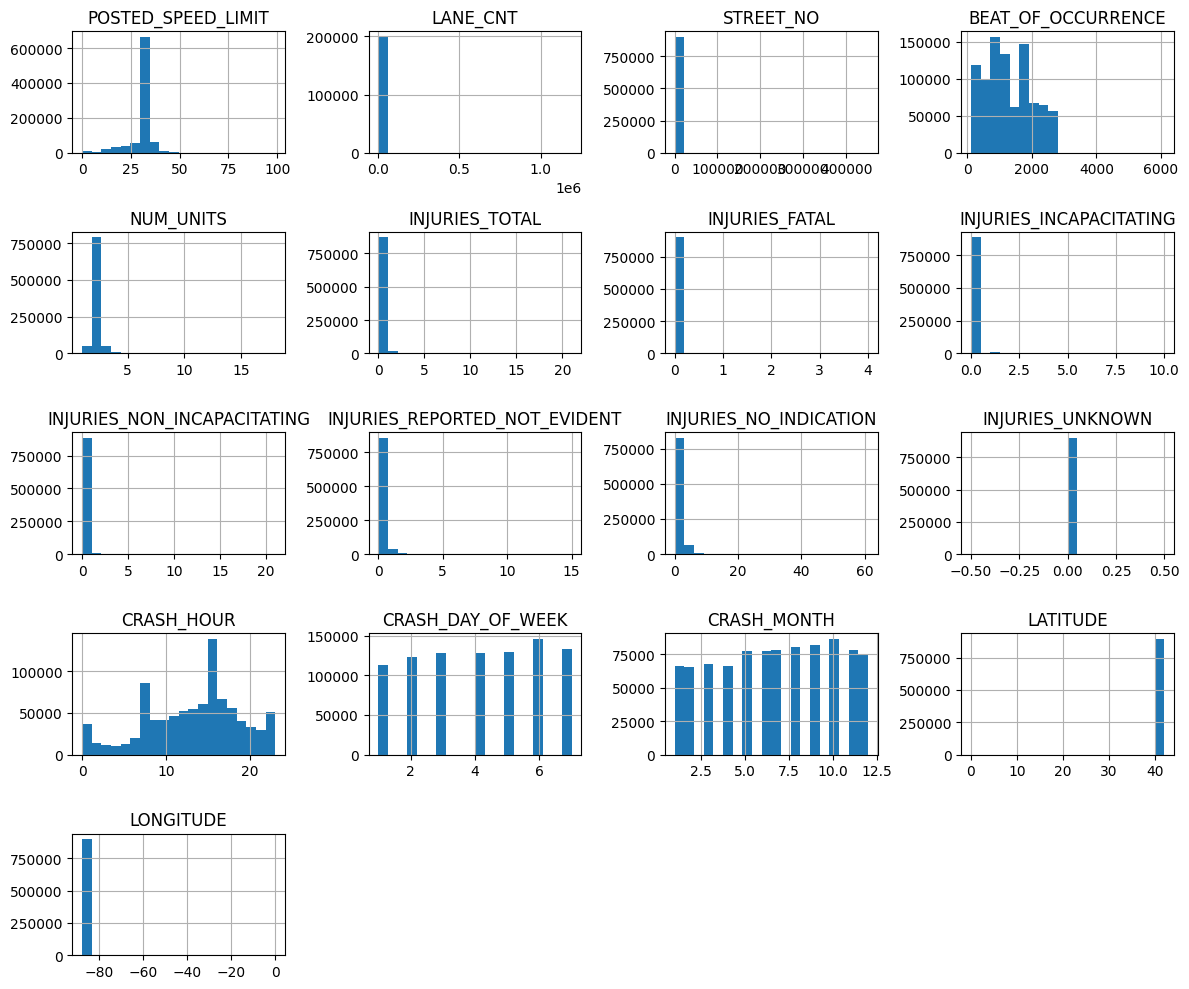

In [14]:
# calls plot_histograms function with traffic_crashes_df to visualize distributions for numeric data 
plot_histograms(traffic_crashes_df)

In [15]:
# calculates the earliest and most recent data entries in this dataframe
analyze_dates(traffic_crashes_df, 'CRASH_DATE')

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



(Timestamp('2013-03-03 16:48:00'), Timestamp('2024-12-14 00:08:00'))

### 2.2.2 People Dataset

In [16]:
# previews data for People dataset

people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [17]:
# provides info about the structure of the dataframe
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979859 entries, 0 to 1979858
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [18]:
# gets percentage of null values for each feature in people_df
(people_df.isna().sum()/len(people_df))*100

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
CRASH_RECORD_ID           0.000000
VEHICLE_ID                2.053177
CRASH_DATE                0.000000
SEAT_NO                  79.779722
CITY                     27.234616
STATE                    26.128325
ZIPCODE                  33.053566
SEX                       1.683908
AGE                      29.113487
DRIVERS_LICENSE_STATE    41.463912
DRIVERS_LICENSE_CLASS    51.340474
SAFETY_EQUIPMENT          0.278858
AIRBAG_DEPLOYED           1.975696
EJECTION                  1.256756
INJURY_CLASSIFICATION     0.037983
HOSPITAL                 83.806675
EMS_AGENCY               90.005854
EMS_RUN_NO               98.331901
DRIVER_ACTION            20.399685
DRIVER_VISION            20.430950
PHYSICAL_CONDITION       20.344782
PEDPEDAL_ACTION          98.038042
PEDPEDAL_VISIBILITY      98.041628
PEDPEDAL_LOCATION        98.038042
BAC_RESULT               20.352510
BAC_RESULT VALUE         99.890295
CELL_PHONE_USE      

Plotting histograms for numeric features...



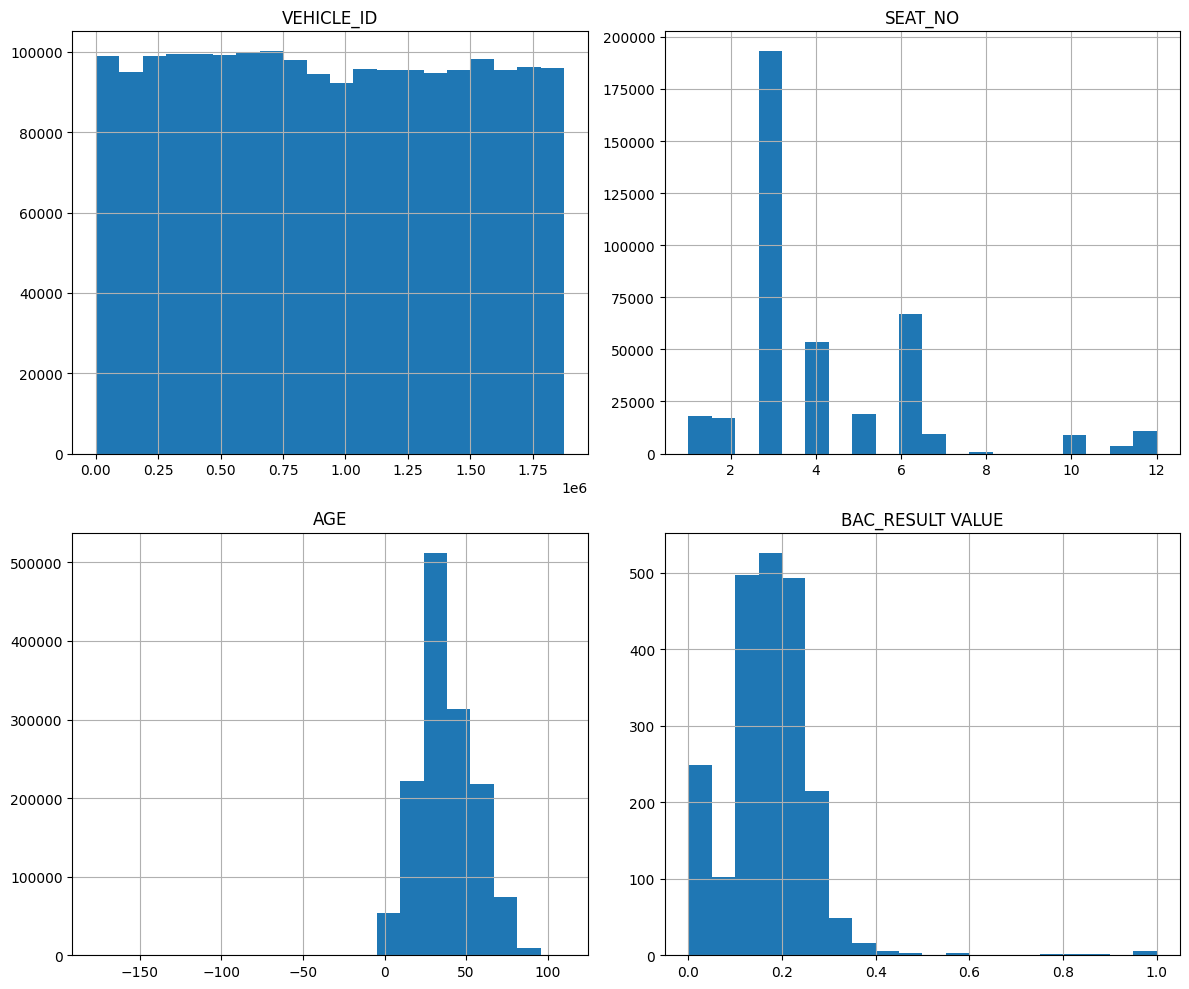

In [19]:
# calls plot_histograms function with people_df to visualize distributions for numeric data 
plot_histograms(people_df)

In [20]:
# calculates the earliest and most recent data entries in this dataframe
analyze_dates(people_df, 'CRASH_DATE')

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



(Timestamp('2013-03-03 16:48:00'), Timestamp('2024-12-14 00:08:00'))

### 2.2.3 Vehicles Dataset

In [21]:
# previewing data

vehicles_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# getting understanding of dataset structure
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838822 entries, 0 to 1838821
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

In [23]:
# gets percentage of null values for each feature in vehicles_df
(vehicles_df.isna().sum()/len(vehicles_df))*100

CRASH_UNIT_ID               0.000000
CRASH_RECORD_ID             0.000000
CRASH_DATE                  0.000000
UNIT_NO                     0.000000
UNIT_TYPE                   0.122578
                             ...    
CARGO_BODY_TYPE            99.201935
LOAD_TYPE                  99.237773
HAZMAT_OUT_OF_SERVICE_I    99.303141
MCS_OUT_OF_SERVICE_I       99.290470
HAZMAT_CLASS               99.936155
Length: 71, dtype: float64

Plotting histograms for numeric features...



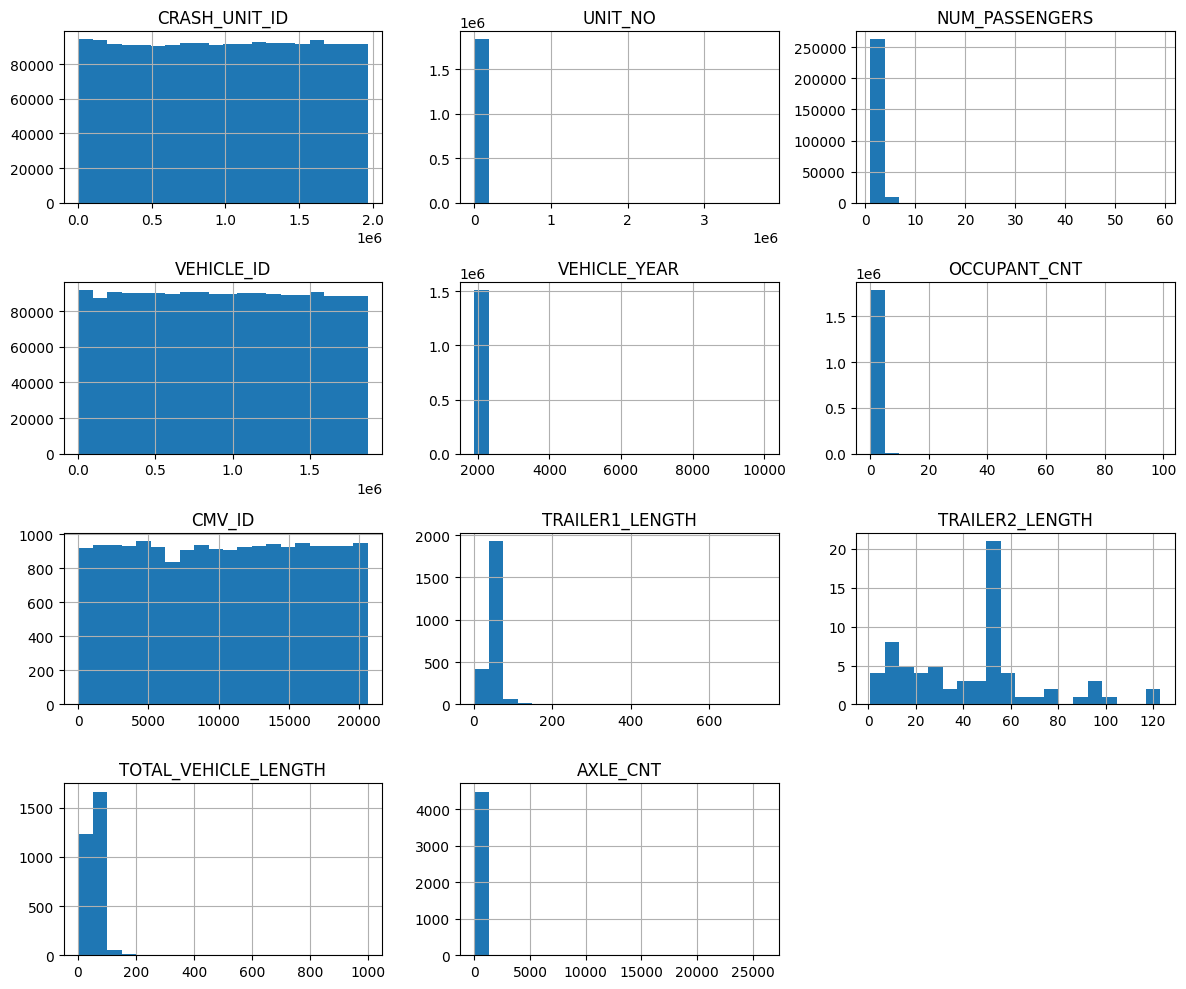

In [24]:
# calls plot_histograms function with vehicles_df to visualize distributions for numeric data 

plot_histograms(vehicles_df)

In [25]:
# calculates the earliest and most recent data entries in this dataframe
analyze_dates(vehicles_df, 'CRASH_DATE')

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



(Timestamp('2013-03-03 16:48:00'), Timestamp('2024-12-14 00:08:00'))

### 2.2.4 Target Class

In [25]:
# stores and print the class distrbution for the target variable
injury_counts = traffic_crashes_df['MOST_SEVERE_INJURY'].value_counts()
injury_counts

NO INDICATION OF INJURY     772801
NONINCAPACITATING INJURY     71130
REPORTED, NOT EVIDENT        39463
INCAPACITATING INJURY        15074
FATAL                          985
Name: MOST_SEVERE_INJURY, dtype: int64

In [26]:
# Prints the class distribution for the target variable as a percentage
round(traffic_crashes_df['MOST_SEVERE_INJURY'].value_counts(normalize = True), 4)

NO INDICATION OF INJURY     0.8592
NONINCAPACITATING INJURY    0.0791
REPORTED, NOT EVIDENT       0.0439
INCAPACITATING INJURY       0.0168
FATAL                       0.0011
Name: MOST_SEVERE_INJURY, dtype: float64

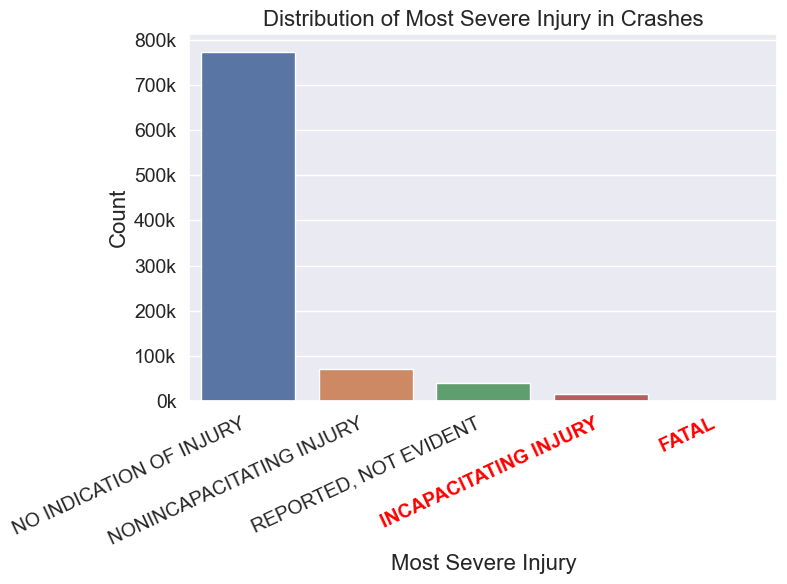

In [27]:
# plots a bar graph visualizing the distribution of target variable features

# Creates the bar plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=injury_counts.index, y=injury_counts.values)

# Custom y-axis formatting to show values in 'k'
def y_axis_formatter(x, pos):
    
    """
    Format the y-axis labels to display values in 'k' (thousands).

    This function takes a numerical value (x) and converts it to a string representation 
    with a 'k' suffix, indicating that the number is in thousands. The function is intended 
    for use as a formatter in matplotlib plots to make large numbers easier to read.

    Args:
    x (float): The value to be formatted.
    pos (int): The position of the tick (not used in the formatting, but required by matplotlib's formatter interface).

    Returns:
    str: The formatted string with a 'k' suffix (e.g., "10k" for 10000).
    """
    
    # Dividing by 1000 to convert to "k"
    return f'{int(x / 1000)}k'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))

# Add titles and labels
plt.title('Distribution of Most Severe Injury in Crashes', fontsize=16)
plt.xlabel('Most Severe Injury', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=25, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Make specific x-axis labels bold and red
highlighted_labels = ['FATAL', 'INCAPACITATING INJURY']  
for label in plt.gca().get_xticklabels():
    if label.get_text() in highlighted_labels:
        label.set_fontweight('bold')
        label.set_color('red')

# Save the plot with a transparent background
plt.tight_layout()

# saving the visualization is commented out 
#plt.savefig('images/most_severe_distribution.jpg', transparent=False)  

plt.show()

## 3. <a name ="Data-Preparation"></a> Data Preparation

For streamlined reproducibility, the data cleaning process was completed in `data_cleaning_notebook.ipynb`. The final cleaned dataset, `crashes_finalized_df`, has been uploaded to Kaggle for easy access. For more detailed information on my data cleaning steps and justifications, please refer to the [data_cleaning_notebook.ipynb](https://github.com/ckucewicz/traffic_crash_prediction/blob/main/data_cleaning_notebook.ipynb).
<br>
#### **Overview of Data Preparation Steps**

With such a massive dataset, cleaning was critical to reduce noise, ensure accuracy, and prepare the data for analysis. Key steps included:
1. **Data Cleaning**: Inspected the structure of each dataset (crashes_df, people_df, vehicles_df), formatted feature names and values, removed features with excessive nulls, and resolved duplicates.


2. **Feature Refinement**: Reduced feature cardinality through label reclassification and dropped uninformative or redundant columns to focus the analysis.


3. **Aggregating for Crash-Level Analysis**: Aggregated people_df and vehicles_df to avoid many-to-many relationships, ensuring accurate feature representation when merged with crashes_df.


4. **Target Variable Adjustment**: Simplified the target variable (most_severe_injury) into a binary classification for serious vs. non-serious injuries, focusing the modeling on significant crash outcomes.


5. **Stratified Sampling**: Created a balanced subset of over 600,000 records for efficient analysis, maintaining the proportional distribution of the target variable classes.

#### **Final Cleaned Dataframe Overview**:
   * Subset of merged data from `crashes_df`, `people_df`, and `vehicles_df`
   * ***15***% random sample, keeping target class proportional with merged dataset
   * Total of approximately ***96k*** records and ***16*** features
   * Ready for modeling -- no null values

In [29]:
# gets a preview of the cleaned dataset
crashes_finalized_df.head()

,lighting_condition,roadway_surface_cond,speed_limit_category,traffic_control_category,road_category,severity_category,crash_cause_category,time_of_day,day_of_week,season,sex,age_group,airbag_deployed,vehicle_category,maneuver_category
0,"darkness, lighted road",dry,Medium,Sign,unknown,0,Aggressive/Reckless Driving,Night (Early),Mon,Winter,male,27-65,Not Deployed,Passenger Vehicles,Standard Movement
1,daylight,dry,Medium,Other,unknown,0,Unknown/Other,Night (Early),Sun,Summer,male,27-65,Not Deployed,Passenger Vehicles,Standard Movement
2,daylight,dry,Medium,Signal,unknown,0,Aggressive/Reckless Driving,Afternoon,Wed,Summer,female,27-65,Not Deployed,Buses,Standard Movement
3,daylight,dry,Medium,Signal,unknown,0,Aggressive/Reckless Driving,Morning,Fri,Spring,female,1-15,Not Deployed,Passenger Vehicles,Standard Movement
4,daylight,dry,Medium,Signal,unknown,0,Aggressive/Reckless Driving,Afternoon,Wed,Fall,female,27-65,Not Deployed,Passenger Vehicles,Standard Movement


In [30]:
# provides an overview of the structure of the cleaned data set
crashes_finalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95919 entries, 0 to 95918
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   lighting_condition        95919 non-null  object
 1   roadway_surface_cond      95919 non-null  object
 2   speed_limit_category      95919 non-null  object
 3   traffic_control_category  95919 non-null  object
 4   road_category             95919 non-null  object
 5   severity_category         95919 non-null  int64 
 6   crash_cause_category      95919 non-null  object
 7   time_of_day               95919 non-null  object
 8   day_of_week               95919 non-null  object
 9   season                    95919 non-null  object
 10  sex                       95919 non-null  object
 11  age_group                 95919 non-null  object
 12  airbag_deployed           95919 non-null  object
 13  vehicle_category          95919 non-null  object
 14  maneuver_category     

In [31]:
# converts all features besides the target to category data types 

# Select all columns except the target column
columns_to_convert = [col for col in crashes_finalized_df.columns if col != 'severity_category']

# Convert the selected columns to category type
crashes_finalized_df[columns_to_convert] = crashes_finalized_df[columns_to_convert].apply(lambda x: x.astype('category'))

# Optionally, check the types
print(crashes_finalized_df.dtypes)

lighting_condition          category
roadway_surface_cond        category
speed_limit_category        category
traffic_control_category    category
road_category               category
severity_category              int64
crash_cause_category        category
time_of_day                 category
day_of_week                 category
season                      category
sex                         category
age_group                   category
airbag_deployed             category
vehicle_category            category
maneuver_category           category
dtype: object


In [32]:
# provides the count of nulls for each feature in cleaned dataframe
crashes_finalized_df.isna().sum()

lighting_condition          0
roadway_surface_cond        0
speed_limit_category        0
traffic_control_category    0
road_category               0
severity_category           0
crash_cause_category        0
time_of_day                 0
day_of_week                 0
season                      0
sex                         0
age_group                   0
airbag_deployed             0
vehicle_category            0
maneuver_category           0
dtype: int64

In [33]:
# provides the distribution percentages for each class of the target variable
crashes_finalized_df.severity_category.value_counts(normalize = True)

0    0.98088
1    0.01912
Name: severity_category, dtype: float64

In [34]:
# provides distribution counts for each class of the target variable
crashes_finalized_df.severity_category.value_counts()

0    94085
1     1834
Name: severity_category, dtype: int64

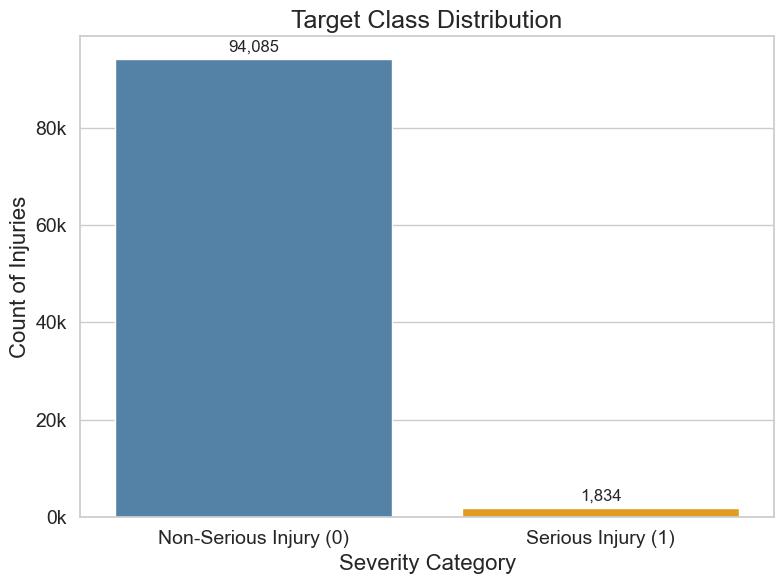

In [33]:
# Count severity category values
severity_counts = crashes_finalized_df.severity_category.value_counts()

# Define custom labels for better readability
category_labels = {
    0: 'Non-Serious Injury (0)',
    1: 'Serious Injury (1)'
}

# Re-map index for better x-axis labels
categories = [category_labels.get(i, str(i)) for i in severity_counts.index]

# Plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
colors = ['steelblue', 'orange']  # 0 and 1 categories

barplot = sns.barplot(x=categories, y=severity_counts.values, palette=colors)

# Add count labels on top of each bar
for i, val in enumerate(severity_counts.values):
    barplot.text(i, val + max(severity_counts.values)*0.01, f'{val:,}', 
                 ha='center', va='bottom', fontsize=12)

# Y-axis formatter for thousands
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))

# Labels and titles
plt.title('Target Class Distribution', fontsize=18)
plt.xlabel('Severity Category', fontsize=16)
plt.ylabel('Count of Injuries', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure (for GitHub Pages)
plt.tight_layout()
plt.savefig('docs/images/target_distribution.jpg', dpi=300, transparent=True)

plt.show()

## 4. <a name ="Exploratory-Data-Analysis"></a>Exploratory Data Analysis (EDA)

Since the dataset focuses solely on crash incidents and lacks data on all vehicle trips (including safe ones), it’s impossible to directly compare features across serious crashes and all vehicle trips. As a workaround, I compared the percentage of features in serious crashes against their percentage in both serious and non-serious crashes combined. This approach helped identify features that are disproportionately represented in serious crashes, suggesting they may play a role in predicting severe crash outcomes.

### Key findings:
#### 1. Overrepresented Categories in Serious Crashes:
* **Sex**: 

Males are overrepresented in serious injuries, accounting for **54.4**% of serious injuries, despite comprising **47.8**% of total injuries.


* **Lighting Condition**: 

Crashes occurring in darkness with lighted roads are overrepresented in serious injuries, accounting for **30.4**% of serious injuries, compared to only **22.0**% of total injuries.


* **Airbag Deployment**: 

Airbags are deployed in **35.4**% of serious injury crashes, compared to **9.5**% of total injuries, suggesting that airbag deployment may serve as a proxy for factors such as vehicle size or speed, indicating higher impact forces in serious crashes.
    
#### 2. Proxies for Speed as a Contributing Factor:


* **Road Speed Limits**: 

Roads classified as having ‘slow’ speed limits (< 25 mph) show disproportionately fewer serious crashes, while roads with ‘medium’ speed limits (26-40 mph) are overrepresented in serious crashes.


* **Aggressive/Reckless Driving**: 

Causes of crashes classified as aggressive/reckless driving (e.g., speeding, tailgating, improper passing) account for 55% of serious crashes.


* **Airbag Deployment as a Proxy**: 

Airbag deployment, which is more prevalent in serious injury crashes, may serve as a proxy for crash severity, reflecting higher impact forces typically associated with higher speeds or larger vehicles.

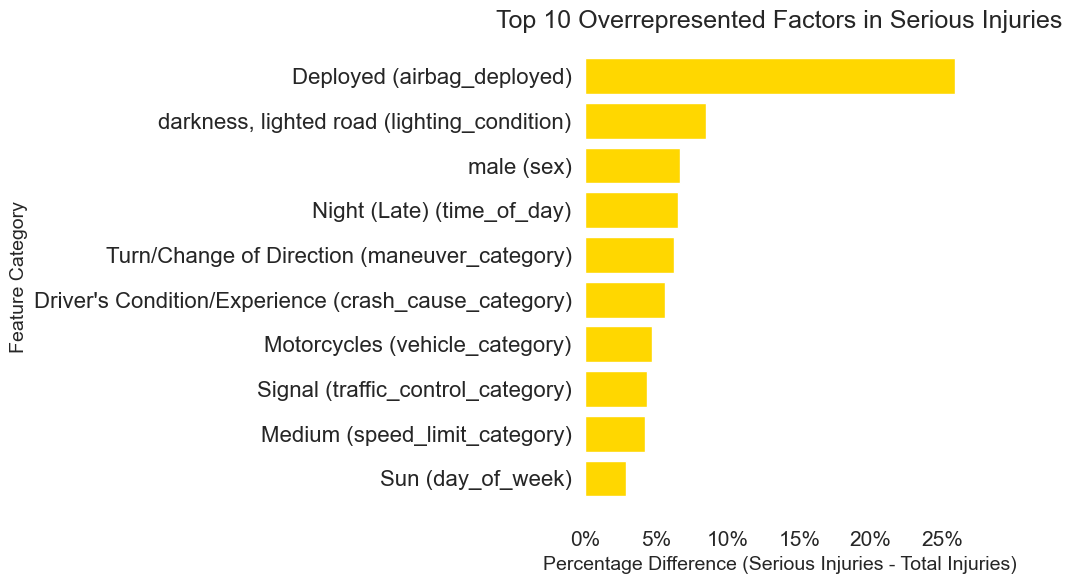

In [36]:
# List of features you want to analyze
features_to_analyze = [col for col in crashes_finalized_df.columns if col != 'severity_category']

# Create an empty list to store the differences and their corresponding feature categories
differences = []

for feature in features_to_analyze:
    # Filter data to only include serious injuries (severity_category = 1)
    serious_injuries_df = crashes_finalized_df[crashes_finalized_df['severity_category'] == 1]
    
    # Calculate the percentage distribution for the specified feature in serious injuries
    serious_feature_distribution = serious_injuries_df[feature].value_counts(normalize=True)
    
    # Calculate the percentage distribution for the specified feature in all crashes
    total_feature_distribution = crashes_finalized_df[feature].value_counts(normalize=True)
    
    # Calculate the percentage difference (serious injuries - total injuries)
    feature_categories = total_feature_distribution.index
    for category in feature_categories:
        if category in serious_feature_distribution.index:
            serious_pct = serious_feature_distribution[category]
            total_pct = total_feature_distribution[category]
            diff = serious_pct - total_pct  # Positive means overrepresented in serious injuries
            differences.append((feature, category, diff * 100))  # Store feature name, category, and percentage difference

# Convert the list to a DataFrame
diff_df = pd.DataFrame(differences, columns=['Feature', 'Category', 'Difference'])

# Filter out negative differences (we only care about overrepresented categories)
diff_df = diff_df[diff_df['Difference'] > 0]

# Sort the DataFrame by the 'Difference' column in descending order (highest differences first)
top_10_diff_df = diff_df.sort_values(by='Difference', ascending=False).head(10)

# Reverse the order of the categories for plotting
top_10_diff_df = top_10_diff_df.iloc[::-1]

# Plot the data
plt.figure(figsize=(10, 6))
ax = plt.barh(top_10_diff_df['Category'] + ' (' + top_10_diff_df['Feature'] + ')',
              top_10_diff_df['Difference'], color='gold')

# Get the current axes for formatting
ax = plt.gca()

# Set background color to white
ax.set_facecolor('white')

# Adding titles and labels
plt.title("Top 10 Overrepresented Factors in Serious Injuries", fontsize=18)
plt.xlabel("Percentage Difference (Serious Injuries - Total Injuries)", fontsize=14)
plt.ylabel("Feature Category", fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)

# Format x-axis labels as percentages
formatter = FuncFormatter(lambda x, _: f'{x:.0f}%')
ax.xaxis.set_major_formatter(formatter)

# Display the plot
plt.tight_layout()

# Save the plot as a PNG file if desired
save_viz = False  # Change this to False if you don't want to save the plot
if save_viz:
    plt.savefig("./images/top_10_overrepresented.png", format='png', bbox_inches='tight')
    print("Plot saved as top_10_overrepresented.png")

# Show the plot
plt.show();

In [41]:
# function that provides a pivot table and bar graph for a feature representing the percentages among serious injury crashes vs serious + non-serious crashes

def feature_analysis_and_plot(crashes_df, feature, custom_labels=None, save_viz=False, save_path="./images/feature_distribution_plot.png"):
    """
    Creates a pivot table and then plots the comparison of a specified feature's distribution in serious injuries vs total injuries.
    
    Parameters:
    - crashes_df: DataFrame containing crash data
    - feature: The column name (as a string) in the DataFrame for which the distribution will be shown and plotted
    - custom_labels: Optional dictionary to map feature values to custom labels (e.g., { 'm': 'Male', 'f': 'Female' })
    - save_viz: Boolean flag to save the plot as a file (default is False, not saved)
    - save_path: File path for saving the plot (default is "feature_distribution_plot.png")
    
    Returns:
    - None: Displays the pivot table and the plot
    """
    # Filter data to only include serious injuries (severity_category = 1)
    serious_injuries_df = crashes_df[crashes_df['severity_category'] == 1]

    # Calculate the percentage distribution for the specified feature in serious injuries
    serious_feature_distribution = serious_injuries_df[feature].value_counts(normalize=True)

    # Calculate the percentage distribution for the specified feature in all crashes
    total_feature_distribution = crashes_df[feature].value_counts(normalize=True)

    # Combine the distributions into a single DataFrame for comparison
    feature_distribution = pd.DataFrame({
        'Total Injuries (%)': total_feature_distribution,
        'Serious Injuries (%)': serious_feature_distribution
    })

    # If custom labels are provided, apply them to the index (x-axis categories)
    if custom_labels:
        feature_distribution.index = feature_distribution.index.map(custom_labels)

    # Create a pivot table with the feature categories as the index and columns as Total and Serious Injuries
    pivot_table = feature_distribution

    # Display the pivot table as percentages (optional formatting step)
    pivot_table = pivot_table * 100  # Convert to percentage

    # Round the percentages to 1 decimal place
    pivot_table = pivot_table.round(1)

    # Format the feature name in title case and split by underscores
    formatted_feature_name = ' '.join(feature.split('_')).title()

    # Print a more descriptive message before the pivot table
    print(f"{formatted_feature_name} Distribution Percentages:")
    print(pivot_table)

    # Plot the data
    ax = feature_distribution.plot(kind='barh', figsize=(10, 6), width=0.8, color=['lightgrey', 'gold'])

    # Set background color to white
    ax.set_facecolor('white')

    # Adding titles and labels
    plt.title(f"Comparison of {formatted_feature_name} Distribution: Serious Injuries vs Total Injuries", fontsize=20)
    plt.ylabel(formatted_feature_name, fontsize=16)
    plt.xlabel("Percentage", fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    # Format y-axis labels as percentages
    formatter = FuncFormatter(lambda x, _: f'{x*100:.0f}%')  # Multiply by 100 to convert to percentage
    ax.xaxis.set_major_formatter(formatter)

    # Display the plot
    plt.tight_layout()
    
    # If save_viz is True, save the plot as a PNG file
    if save_viz:
        plt.savefig(save_path, format='png', bbox_inches='tight')
        print("")
        print(f"Plot saved as {save_path}")
    
    # Show the plot
    plt.show()

Airbag Deployed Distribution Percentages:
              Total Injuries (%)  Serious Injuries (%)
Not Deployed                90.5                  64.6
Deployed                     9.5                  35.4


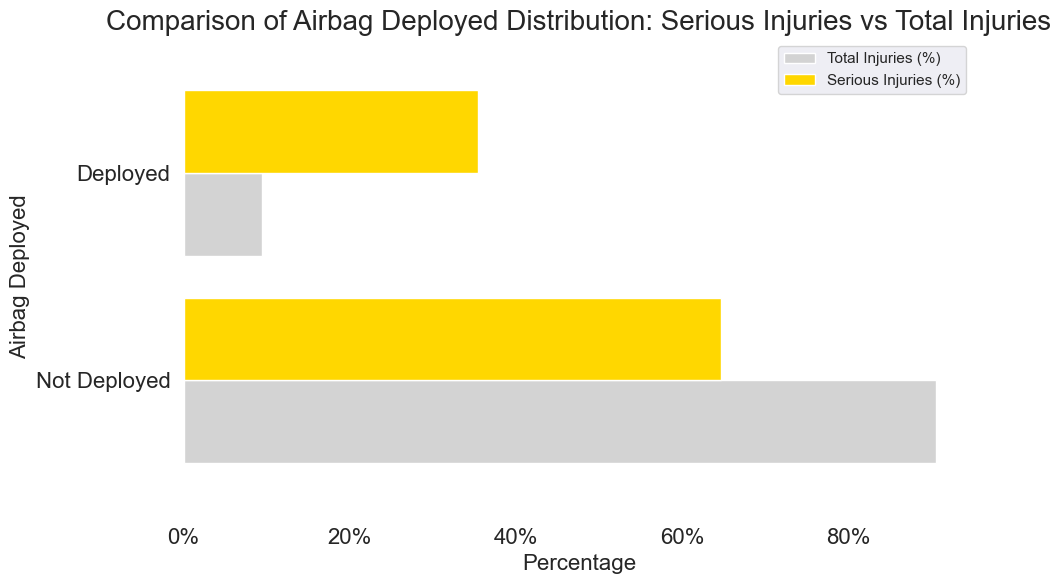

In [42]:
# pivot table and visualization for airbag_deployed feature

feature_analysis_and_plot(crashes_finalized_df, 'airbag_deployed', save_viz=False, save_path="./images/sex_distribution_plot.png")


Airbag Deployment Analysis of Pivot table and bar graph:


**Initial Observation**: The data reveals that airbag deployment is overrepresented in serious injuries. Specifically, **9.5**% of total injuries had airbags deployed, but **35.4**% of serious injuries had airbags deployed. This suggests that airbags are more likely to deploy in serious crashes.


**Surface-Level Interpretation**: At first glance, this might seem intuitive—it’s well-known that airbags help reduce the severity of injuries, particularly by preventing passengers from being ejected or mitigating the impact force. However, this is just the beginning of understanding what the airbag deployment data might signify.
	
    
**Deeper Insight**: Airbag deployment is triggered by a certain amount of force at impact, typically caused by a combination of vehicle mass (size of the vehicle) and speed at impact. The fact that airbags are deployed in serious crashes likely indicates significant force. If airbags were not deployed in serious injury cases, it could suggest an issue with the vehicle (e.g., non-functioning airbags or older cars) rather than a lack of impact force. This implies that the severity of the injury is more directly related to the force of the crash than the presence or absence of airbags.


**Takeaway**: In this context, airbag deployment can be seen as a potential proxy for factors like vehicle size and speed at impact, both of which are significant contributors to crash severity. The absence of deployment in a serious injury crash might reflect issues related to vehicle condition, such as older cars or malfunctioning airbag systems.

This analysis connects the data to the broader context of crash dynamics (force, vehicle characteristics, and airbag functionality) and provides a nuanced interpretation of why airbag deployment might correlate with serious injuries.

Lighting Condition Distribution Percentages:
                        Total Injuries (%)  Serious Injuries (%)
daylight                              69.3                  59.8
darkness, lighted road                22.0                  30.4
darkness                               4.1                   4.4
dusk                                   3.0                   3.2
dawn                                   1.6                   2.2


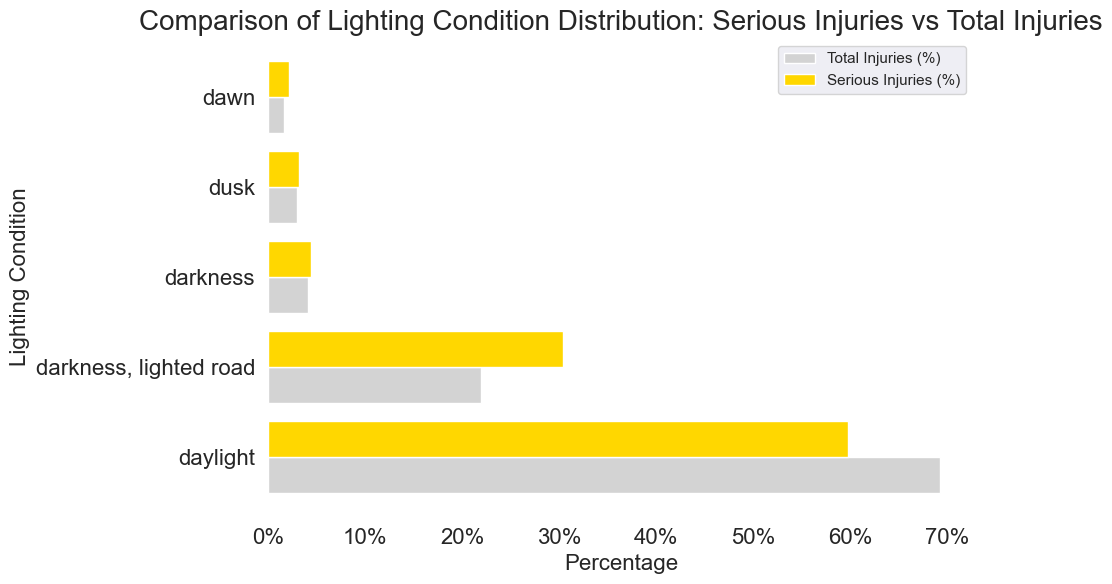

In [43]:
# pivot table and visualization for airbag_deployed feature

feature_analysis_and_plot(crashes_finalized_df, 'lighting_condition', save_viz=False, save_path="./images/lighting_dist_plot.png")


Sex Distribution Percentages:
        Total Injuries (%)  Serious Injuries (%)
female                52.2                  45.4
male                  47.8                  54.4
other                  0.0                   0.2


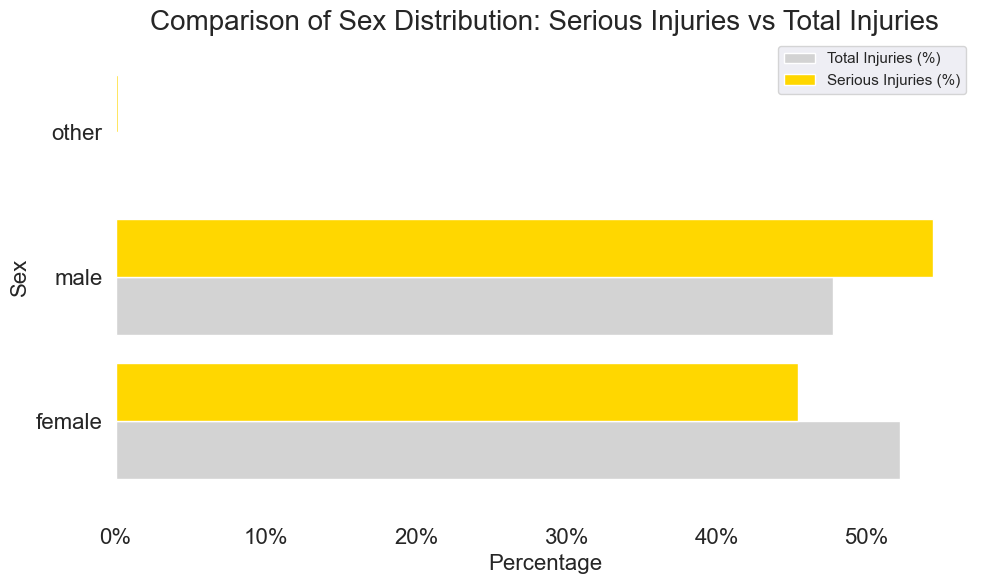

In [44]:
# pivot table and visualization for sex feature

feature_analysis_and_plot(crashes_finalized_df, 'sex', save_viz= False,save_path="./images/sex_dist_plot.png" )

Age Group Distribution Percentages:
       Total Injuries (%)  Serious Injuries (%)
27-65                64.8                  63.6
16-26                28.1                  26.6
65+                   4.0                   5.5
1-15                  3.1                   4.3


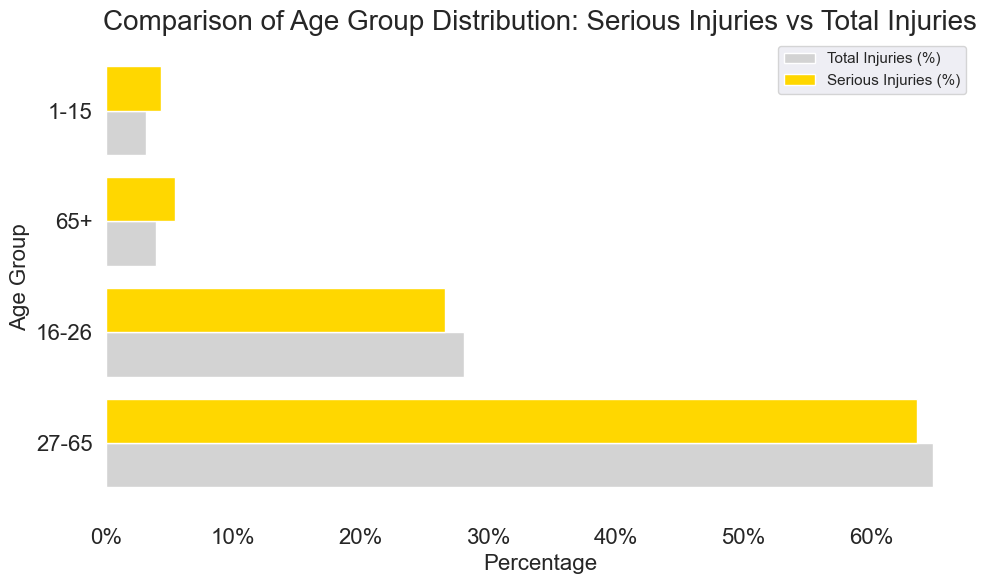

In [45]:
# pivot table and visualization for age_group feature
feature_analysis_and_plot(crashes_finalized_df, 'age_group', save_viz=False, save_path="sex_distribution_plot.png")

Speed Limit Category Distribution Percentages:
        Total Injuries (%)  Serious Injuries (%)
Medium                84.2                  88.3
Low                   14.9                  10.1
High                   1.0                   1.5


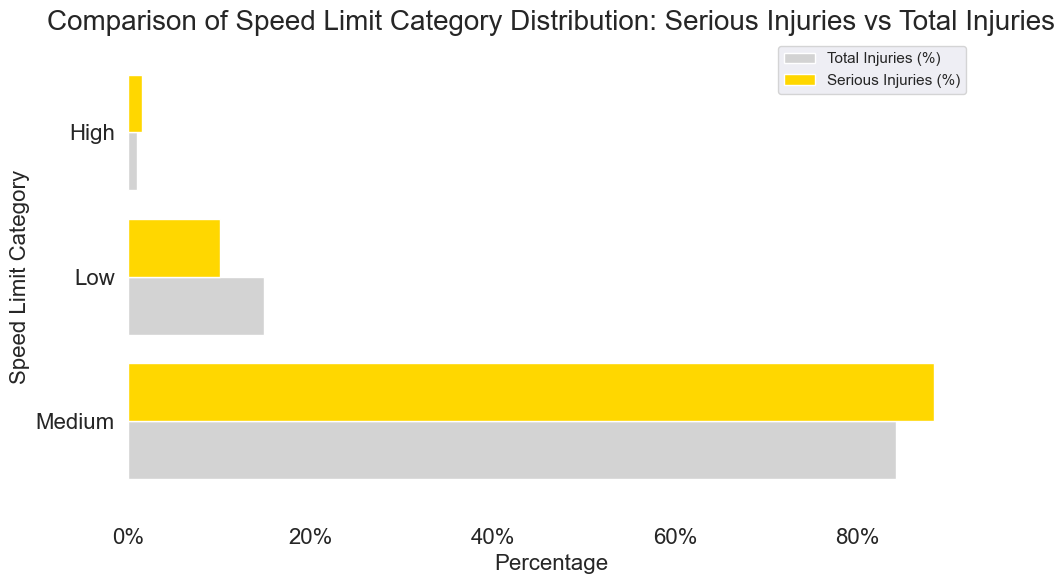

In [46]:
# pivot table and visualization for speed_limit_category feature
feature_analysis_and_plot(crashes_finalized_df, 'speed_limit_category', save_viz=False, save_path="./images/speed_category_distribution_plot.png")

Road Category Distribution Percentages:
                          Total Injuries (%)  Serious Injuries (%)
intersection                             3.1                   5.0
multi-lane bidirectional                17.4                  15.9
multi-lane one way                       1.4                   0.7
other                                    1.9                   1.3
single-lane one way                      1.3                   1.3
unknown                                 75.0                  75.9


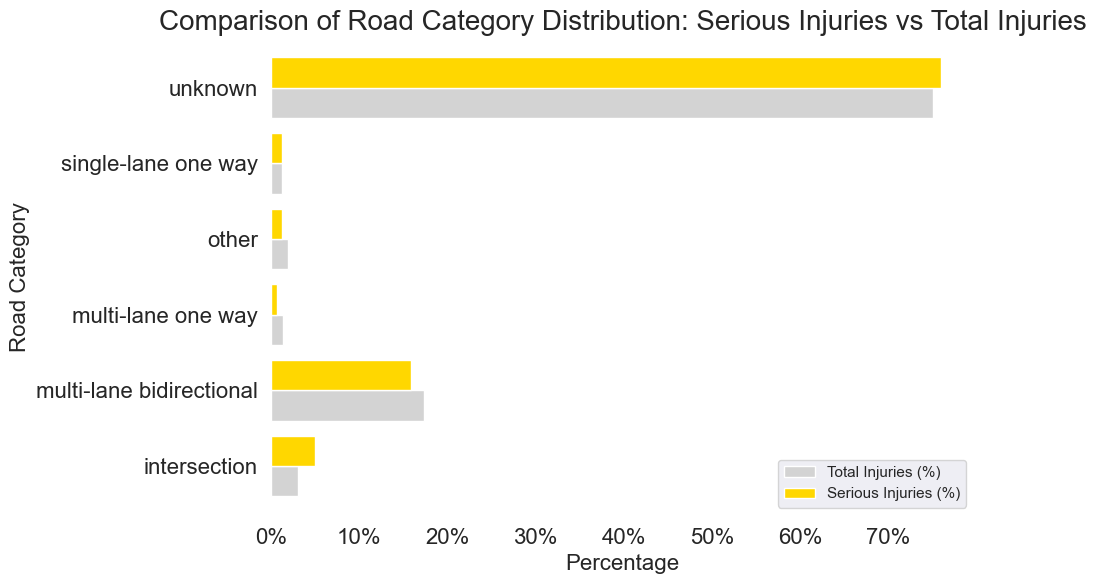

In [47]:
# pivot table and visualization for road category feature
feature_analysis_and_plot(crashes_finalized_df, 'road_category', save_viz=False)

Vehicle Category Distribution Percentages:
                    Total Injuries (%)  Serious Injuries (%)
Buses                              3.1                   1.9
Motorcycles                        0.6                   5.3
Other                              2.6                   2.2
Passenger Vehicles                83.1                  77.3
SUVs                               8.2                   9.8
Trucks                             2.4                   3.5


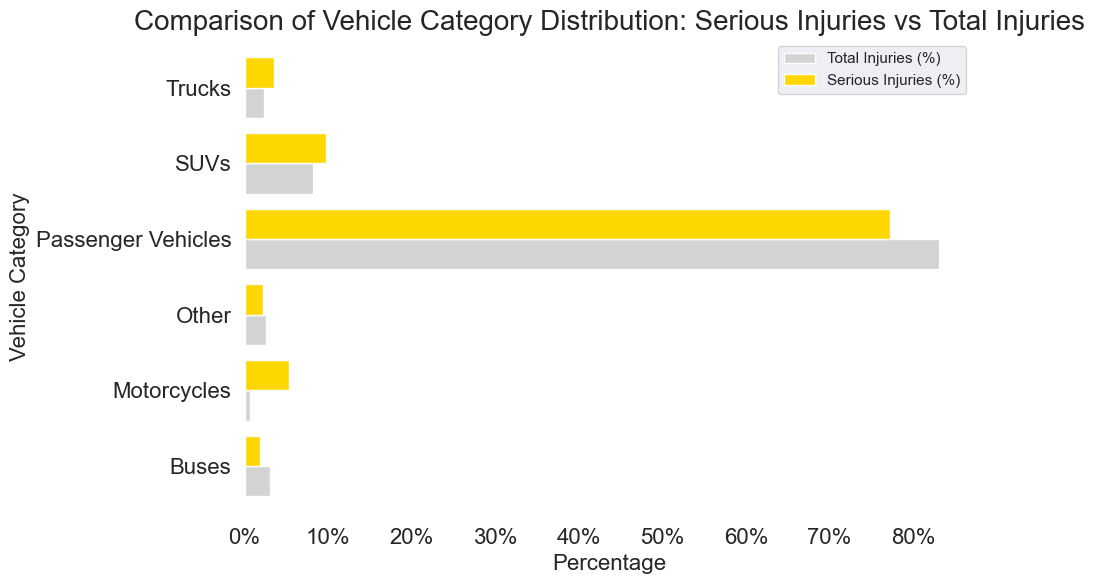

In [48]:
# pivot table and visualization for vehicle_category feature
feature_analysis_and_plot(crashes_finalized_df, 'vehicle_category', save_viz=False, save_path="./images/vehicle_distribution_plot.png")

Crash Cause Category Distribution Percentages:
                                   Total Injuries (%)  Serious Injuries (%)
Aggressive/Reckless Driving                      54.6                  55.0
Unknown/Other                                    34.7                  29.5
Driver's Condition/Experience                     6.5                  12.1
Environmental and Road Conditions                 2.5                   1.7
Distraction                                       1.7                   1.7


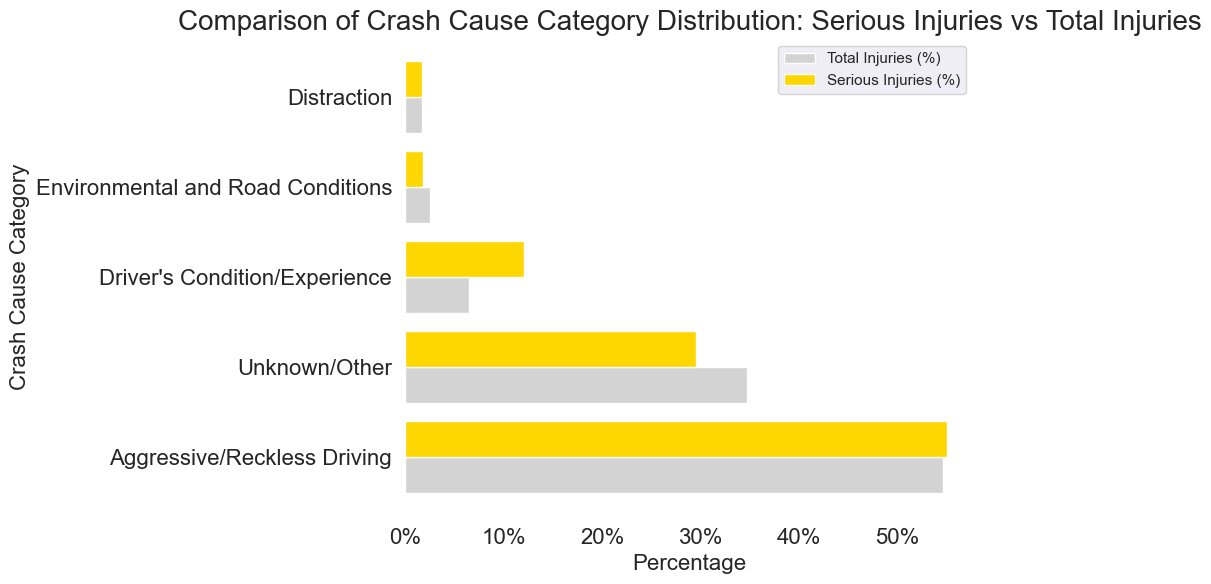

In [49]:
# pivot table and visualization for crash_cause_category feature
feature_analysis_and_plot(crashes_finalized_df, 'crash_cause_category', save_viz=False, save_path="./images/crash_cause_distribution_plot.png")

## 5. <a name ="Modeling"></a>  Modeling

During the modeling phase, I followed standard steps but focused on addressing two key challenges:
### 1. **Developing an Interpretable Inferential Model**
* I prioritized models like logistic regression and decision trees, which are considered white-box models. These models offer transparency and ease of interpretation, enabling a clear understanding of how predictions are made—an essential factor for inferential analysis.


### 2. **Addressing Class Imbalance in the Target Variable (`severity_category`)**
* To mitigate the impact of imbalanced classes, I implemented two techniques:
    * Oversampling with SMOTE (Synthetic Minority Oversampling Technique): SMOTE generates synthetic samples for the minority class by interpolating between existing samples, improving representation in the dataset. However, limitations include potential overfitting to synthetic data.
    

* Adjusting Class Weights: By increasing the penalty for misclassifying minority class samples, this technique naturally shifts model focus towards the minority class. A limitation is the risk of reduced performance on the majority class.


### 3. **Evaluating Model Performance**

* Given the class imbalance in the target variable, accuracy was not a reliable metric, as it could be misleadingly high by favoring the majority class. Instead, I used Precision-Recall Area Under the Curve (PR AUC) to evaluate models. PR AUC focuses on the balance between precision (correctly identified positives) and recall (coverage of actual positives), making it a more suitable metric for imbalanced classification tasks. It highlights the model’s ability to predict the minority class effectively without being biased by the majority class.

### **Steps in Modeling**
#### 1.	**Train-Test Splits**:
* An initial split to avoid data leakage (train and test sets).


* A secondary split for validation, ensuring a hold-out test set for final model evaluation on unseen data.


#### 2. **Evaluation Function**:
* Designed to compute PR AUC values and visualize the PR AUC curve for a comprehensive evaluation.


#### 3.	**Baseline Models**:
* Trained and evaluated simple logistic regression and decision tree models using preprocessing steps like one-hot encoding for categorical variables.


#### 4.	**Addressing Class Imbalance**:
Developed and compared four models to evaluate the effectiveness of different techniques for handling imbalanced data:

   * ***Logistic regression with SMOTE***: Used to balance the dataset by generating synthetic samples for the minority class.
    
   * ***Logistic regression with SMOTE and class weights***: Combined oversampling with a weighting strategy to further enhance focus on the minority class. 
    
   * ***Decision tree with SMOTE***: Applied oversampling to a more interpretable, tree-based model.
    
   * ***Decision tree with SMOTE and class weights***: Combined oversampling with weighted classes to optimize performance.

This approach allowed for a thorough assessment of how these methods interact and impact model performance, particularly in predicting minority class outcomes.


#### 5.	**Hyperparameter Tuning**:


* Used GridSearchCV with cross-validation to optimize class weights for logistic regression and decision tree models.


* Compared all models, evaluating their performance using PR AUC.

### Final Model Selection

After comparing the performance of all trained models, the baseline decision tree emerged as the best-performing model. This model’s simplicity and strong performance made it the most suitable choice for this project.

More details on the best model’s performance and interpretive insights are provided in the evaluation phase.

In [46]:
# identifying predictor variables and target
y = crashes_finalized_df[['severity_category']]
X = crashes_finalized_df.drop(columns = ['severity_category'], axis = 1)

# initial 80/20 split into train and remaining data (for test and validation)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state = 42, test_size = 0.2)

# split remaining 20% into 50/50 for test and validation
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, random_state = 42, test_size = 0.5)  

# Use ravel() to ensure 1D
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

### Building Evaluation Function

In [47]:
def evaluate_pr_auc(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model's performance using PR AUC on train and test datasets, and plot the PR AUC curves.
    
    Parameters:
    - model: Trained classification model.
    - X_train, y_train: Training features and labels.
    - X_test, y_test: Testing features and labels.
    
    Returns:
    - Dictionary with PR AUC scores for train and test sets.
    """
    
    # Predict probabilities for train and test sets
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision, recall, and thresholds for train and test
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)
    
    # Calculate PR AUC for train and test
    pr_auc_train = auc(recall_train, precision_train)
    pr_auc_test = auc(recall_test, precision_test)
    
    # Plot the PR AUC curves
    plt.figure(figsize=(10, 7))
    
    # No-skill baseline (proportion of positive class in the dataset)
    no_skill_train = len(y_train[y_train == 1]) / len(y_train)
    no_skill_test = len(y_test[y_test == 1]) / len(y_test)
    plt.plot([0, 1], [no_skill_train, no_skill_train], linestyle='--', label='No Skill (Train)', color='gray')
    plt.plot([0, 1], [no_skill_test, no_skill_test], linestyle='--', label='No Skill (Test)', color='lightgray')
    
    # Add PR curves
    plt.plot(recall_train, precision_train, label=f'Train PR AUC = {pr_auc_train:.4f}', color='blue')
    plt.plot(recall_test, precision_test, label=f'Test PR AUC = {pr_auc_test:.4f}', color='red')
    
    # Plot settings
    plt.title('Precision-Recall (PR) Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()
    
    # Return PR AUC scores
    return {
        'PR AUC Train': round(pr_auc_train, 4),
        'PR AUC Test': round(pr_auc_test, 4)
    }

## Preprocessing Pipeline

In [48]:
# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.copy()

# Identify numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.copy()

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to categorical features
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False), categorical_features),
        
        # Apply StandardScaler to numerical features
        ('num', StandardScaler(), numerical_features)
    ])

### Baseline Models

#### Baseline Logistic Regression

In [49]:
#  Creates a logistic regression model with preprocessing and model instantiation pipeline
pipeline_logreg_baseline = Pipeline(steps=[
    # Apply the preprocessing steps
    ('preprocessor', preprocessor),  
      # Instantiate the model
    ('classifier', LogisticRegression(solver='liblinear', C=1e16, random_state=42))
])

# Fit the model to the training data
pipeline_logreg_baseline.fit(X_train, y_train)

# generating predictions based on the training features
y_train_pred = pipeline_logreg_baseline.predict(X_train)

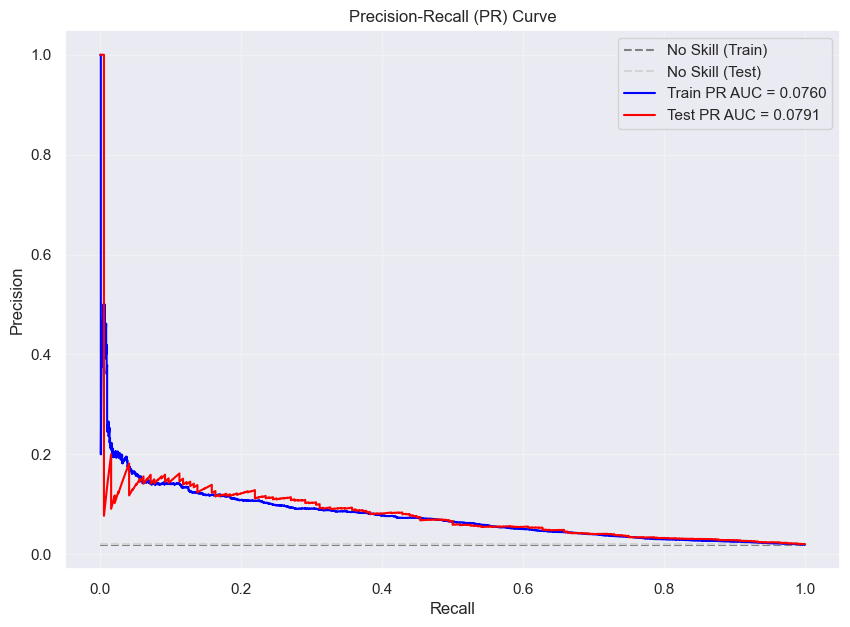

{'PR AUC Train': 0.076, 'PR AUC Test': 0.0791}

In [50]:
# Evaluate the model
evaluate_pr_auc(pipeline_logreg_baseline, X_train, y_train, X_val, y_val)

In [51]:
# generating predictions based on X_val
y_val_pred = pipeline_logreg_baseline.predict(X_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Confusion Matrix:
 [[9396    0]
 [ 196    0]]


In [52]:
# Access the Logistic Regression model from the pipeline
logreg_baseline_model = pipeline_logreg_baseline.named_steps['classifier']

# Get model coefficients and intercept
coefficients = logreg_baseline_model.coef_.flatten()  # Flatten the coefficients array for easier access
intercept = logreg_baseline_model.intercept_[0]

# Access the preprocessor and extract the feature names after preprocessing
preprocessor = pipeline_logreg_baseline.named_steps['preprocessor']
categorical_features = preprocessor.transformers_[0][1].get_feature_names_out()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
feature_names = np.concatenate([categorical_features, numerical_features])

# Create a DataFrame with the feature names and their corresponding coefficients
coef_df = pd.DataFrame(
    data = coefficients,
    index = feature_names,  # Use the feature names after one-hot encoding
    columns = ['Coefficient']  # Name the column as 'Coefficient'
)

# Add a column for the absolute value of the coefficients to sort by significance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Sort the DataFrame by the absolute value of the coefficients in descending order
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(5)

# Display the intercept
print(f"Intercept: {intercept}")

# Display the sorted coefficients
coef_df_sorted

Intercept: -1.41469671626199


,Coefficient,Abs_Coefficient
vehicle_category_Motorcycles,2.811366,2.811366
"roadway_surface_cond_sand, mud, dirt",-2.669651,2.669651
airbag_deployed_Not Deployed,-1.729594,1.729594
sex_other,1.307704,1.307704
traffic_control_category_Other,-1.223703,1.223703


## Baseline Decision Tree

In [53]:
#  Create a decision tree pipeline with preprocessing and model instantiation
pipeline_dt_baseline = Pipeline(steps=[
    # Apply the preprocessing steps
    ('preprocessor', preprocessor),  
      # Instantiate the model
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', random_state=42))
])

In [54]:
pipeline_dt_baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['lighting_condition', 'roadway_surface_cond', 'speed_limit_category',
       'traffic_control_category', 'road_category', 'crash_cause_category',
       'time_of_day', 'day_of_week', 'season', 'sex', 'age_group',
       'airbag_deployed', 'vehicle_category', 'maneuver_category'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

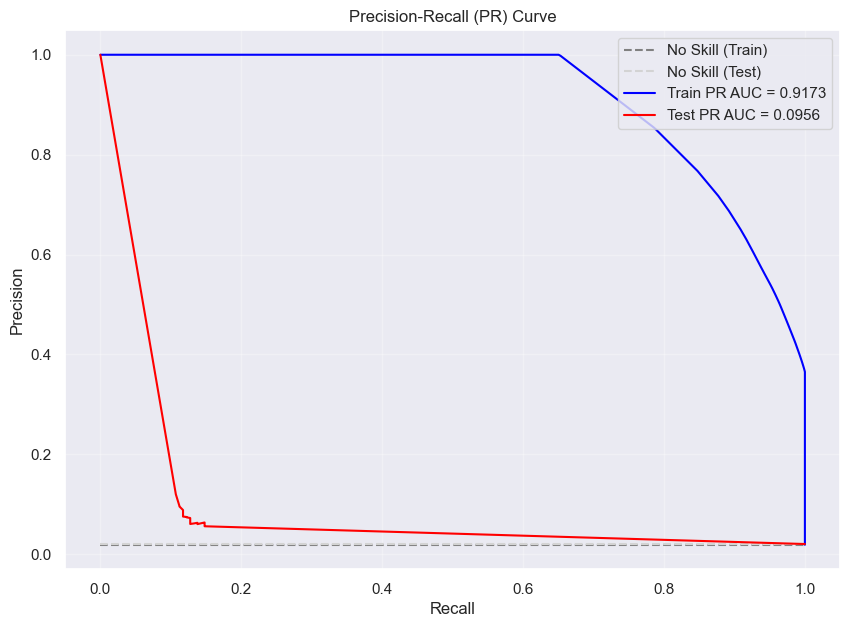

{'PR AUC Train': 0.9173, 'PR AUC Test': 0.0956}

In [55]:
# calls the function on the pipeline
evaluate_pr_auc(pipeline_dt_baseline, X_train, y_train, X_val, y_val)

In [56]:
# generating predictions based on X_val
y_val_pred = pipeline_dt_baseline.predict(X_val)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Confusion Matrix:
 [[9242  154]
 [ 175   21]]


### Addressing Class Imbalance through Sampling and Class Weights

In [57]:
# 1. Logistic Regression + SMOTE
smote = SMOTE(random_state=42)
logreg_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(solver = 'liblinear', C = 1e16, random_state=42))
])

In [58]:
# 2. Logistic Regression + SMOTE + Balanced class weights
logreg_smote_balanced = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(solver = 'liblinear', C = 1e16, class_weight='balanced', random_state=42))
])

In [59]:
# 3. Decision Tree + SMOTE
decision_tree_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', random_state=42))
])

In [60]:
# 4. Decision Tree + SMOTE + Balanced class weights
decision_tree_smote_balanced = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', DecisionTreeClassifier(criterion = 'entropy', class_weight='balanced', random_state=42))
])

In [61]:
# Create a list of models to iterate over
models = [
    ('Logistic Regression + SMOTE', logreg_smote),
    ('Logistic Regression + SMOTE + Balanced', logreg_smote_balanced),
    ('Decision Tree + SMOTE', decision_tree_smote),
    ('Decision Tree + SMOTE + Balanced', decision_tree_smote_balanced)
]

In [62]:
# Initialize an empty list to store the PR AUC scores for each model
pr_auc_scores_list = []

# Loop through the models to calculate the PR AUC for train and validation sets
for model_name, model in models:
    # Train the model once
    model.fit(X_train, y_train)
    
    # Predict probabilities on the training set
    y_train_probs = model.predict_proba(X_train)[:, 1]
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
    pr_auc_train = auc(recall_train, precision_train)
    
    # Predict probabilities on the validation set
    y_val_probs = model.predict_proba(X_val)[:, 1]
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_probs)
    pr_auc_val = auc(recall_val, precision_val)
    
    # Append the results as a dictionary to the list
    pr_auc_scores_list.append({
        'Model': model_name,
        'Train PR AUC': pr_auc_train,
        'Val PR AUC': pr_auc_val
    })

# Convert the list of dictionaries into a DataFrame
pr_auc_df = pd.DataFrame(pr_auc_scores_list)

# Round the values to 4 decimal places
pr_auc_df[['Train PR AUC', 'Val PR AUC']] = pr_auc_df[['Train PR AUC', 'Val PR AUC']].round(4)

# Display the DataFrame
pr_auc_df

,Model,Train PR AUC,Val PR AUC
0,Logistic Regression + SMOTE,0.0688,0.0717
1,Logistic Regression + SMOTE + Balanced,0.0688,0.0717
2,Decision Tree + SMOTE,0.8955,0.0710
3,Decision Tree + SMOTE + Balanced,0.8955,0.0710


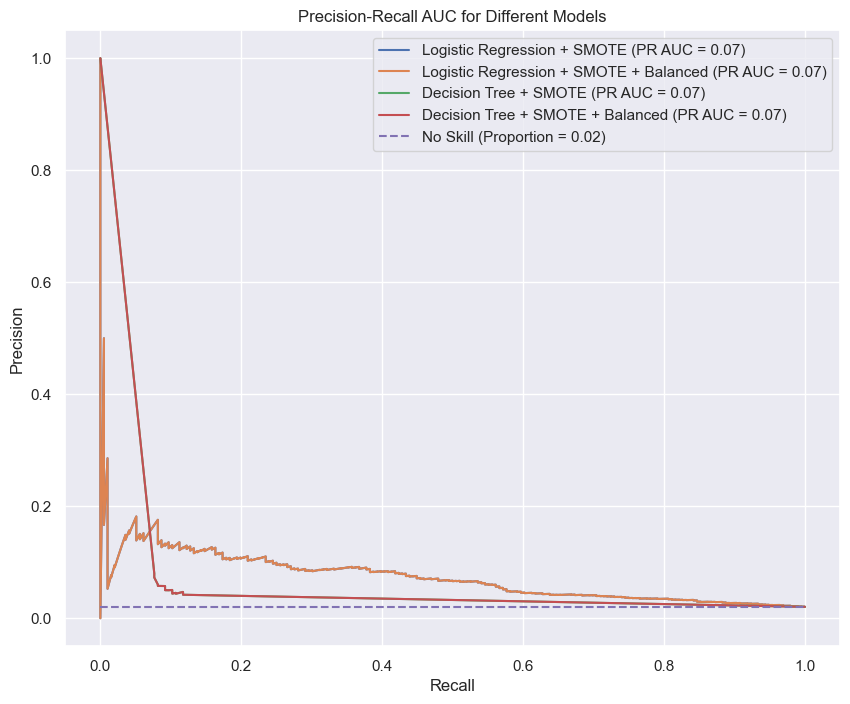

In [63]:
# Ensure y_val is a 1D array (flattened)
y_val = np.array(y_val).flatten()  # Flatten if necessary

# Calculate the proportion of the positive class in y_val
no_skill = y_val.mean()

# Plot the PR AUC curve
plt.figure(figsize=(10, 8))

for model_name, model in models:
    # Predict probabilities on the validation set (no need to fit the model again)
    y_probs = model.predict_proba(X_val)[:, 1]  # Use X_val for predictions
    
    # Calculate precision, recall, and AUC
    precision, recall, _ = precision_recall_curve(y_val, y_probs)  # Use y_val for the ground truth
    pr_auc = auc(recall, precision)
    
    # Plot the PR AUC curve
    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.2f})')

# Plot the no-skill line (reflecting class imbalance)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label=f'No Skill (Proportion = {no_skill:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall AUC for Different Models')
plt.legend(loc='upper right')
plt.grid(True)
plt.show();

### Hyperparameter Tuning with GridSearchCV

In [64]:
# Define custom class weights (adjust as needed)
class_weights = [
    {0: 1, 1: 5},   # Class 0 has normal weight, Class 1 has higher weight
    {0: 1, 1: 10},  # Class 1 gets an even higher weight
    {0: 1, 1: 50},  # Class 1 gets much higher weight
]

# Define parameters for GridSearchCV (tuning class_weight)
param_grid_logreg = {
    'classifier__class_weight': class_weights,  # Tune class_weight
}

param_grid_dtree = {
    'classifier__class_weight': class_weights,  # Tune class_weight
}


# GridSearchCV for Logistic Regression with SMOTE and custom class weights
grid_logreg = GridSearchCV(
    estimator=ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),  # Apply SMOTE for balancing
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    param_grid=param_grid_logreg,
    cv=5,  # Cross-validation splits
    scoring='average_precision',  
    n_jobs=-1,
    verbose=1
)

# GridSearchCV for Decision Tree with SMOTE and custom class weights
grid_dtree = GridSearchCV(
    estimator=ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),  # Apply SMOTE for class balancing
        ('classifier', DecisionTreeClassifier(criterion = 'entropy', random_state=42))
    ]),
    param_grid=param_grid_dtree,
    cv=5,  # Cross-validation splits
    scoring='average_precision', 
    n_jobs=-1,
    verbose=1
)

# Fit the grid searches
grid_logreg.fit(X_train, y_train)
grid_dtree.fit(X_train, y_train)

# Print best parameters and scores
print("Best Logistic Regression Params:", grid_logreg.best_params_)
print("Best Logistic Regression Score:", round(grid_logreg.best_score_, 4))

print("Best Decision Tree Params:", grid_dtree.best_params_)
print("Best Decision Tree Score:", round(grid_dtree.best_score_, 4))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Logistic Regression Params: {'classifier__class_weight': {0: 1, 1: 5}}
Best Logistic Regression Score: 0.0681
Best Decision Tree Params: {'classifier__class_weight': {0: 1, 1: 50}}
Best Decision Tree Score: 0.021


## 6. <a name ="Evaluation"></a> Evaluation

The predictive performance of my models was generally low, with the best-performing baseline decision tree model achieving a PR AUC of 0.0956 on validation data (where a PR AUC score of 1 represents perfect performance). This could be due to significant class imbalance or suboptimal feature selection during the data preparation phase.

However, the main focus of this project was on model inference rather than predictive accuracy. The goal was to understand how the model makes predictions in order to help identify key contributing factors in serious (fatal or incapacitating) traffic crashes. Decision trees are ideal for this type of analysis because they are simple, interpretable, and provide insights into feature importance.

Entropy is a measure of the uncertainty or impurity in a dataset. When a decision tree splits the data based on a feature, it seeks to reduce the entropy in the resulting subsets. The more a feature helps to reduce uncertainty, the more important it is in making decisions. Information gain is the reduction in entropy when a feature is used to split the data. A higher information gain indicates that the feature is more effective at clarifying the target variable’s behavior.

The feature_importances_ attribute in decision trees ranks features based on how much they reduce entropy across the tree. Features with higher importance scores are those that provide more significant reductions in uncertainty, helping the model make more confident predictions. Unlike linear regression coefficients, feature importance scores in decision trees do not convey the direction or magnitude of the effect on the target variable, but instead reflect their contribution to reducing uncertainty.

Based on the decision tree model, the most important features for predicting serious car crashes were:
   1. **Airbag Deployment (‘Not Deployed’)**
   2. **Crash Cause Category (‘Unknown/Other’)**: Although significant in the model, this feature offers little actionable insight.
   3. **Sex (‘Male’)**
   4. **Seasonality (Summer, Winter, and Spring)**

I’ll elaborate on each of these features below, as they will inform the recommendations in the conclusion.

### Best Model: Decision Tree Baseline 

In [65]:
# Predictions
y_pred = pipeline_dt_baseline.predict(X_test)
y_pred_proba = pipeline_dt_baseline.predict_proba(X_test)[:, 1]

print("PR AUC (Average Precision):", average_precision_score(y_test, y_pred_proba))

PR AUC (Average Precision): 0.02352634204718271


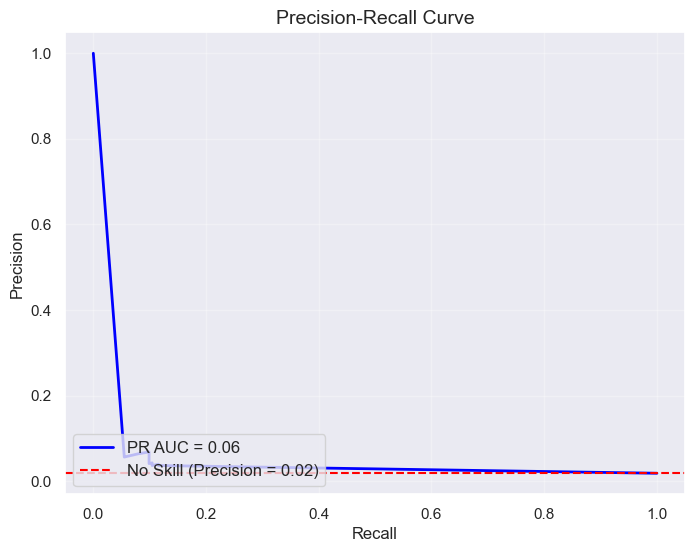

In [66]:
# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate PR AUC
pr_auc = auc(recall, precision)

# Calculate the no-skill line (horizontal line)
no_skill = sum(y_test) / len(y_test)  # Proportion of positive cases in y_test

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', color='blue', linewidth=2)
plt.axhline(y=no_skill, color='red', linestyle='--', label=f'No Skill (Precision = {no_skill:.2f})')
plt.title('Precision-Recall Curve', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.grid(alpha=0.3)
plt.show();

In [67]:
# Access the Decision Tree model from the pipeline
dt_final_model = pipeline_dt_baseline.named_steps['classifier']

# Access the preprocessor from the pipeline
preprocessor = pipeline_dt_baseline.named_steps['preprocessor']

# Extract the feature names after preprocessing

# For categorical features, use get_feature_names_out() to get the encoded feature names
categorical_features = preprocessor.transformers_[0][1].get_feature_names_out()

# For numerical features, extract the columns directly from X_train
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Combine categorical and numerical features
feature_names = np.concatenate([categorical_features, numerical_features])

# Extract the feature importances from the decision tree model
feature_importances = dt_final_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importance scores
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Feature_Importance': np.round(feature_importances, 4)  # Use numpy round instead of built-in round
}).sort_values(by='Feature_Importance', ascending=False).reset_index(drop=True)

# Modify the 'Feature' column to contain only the part after the last '_'
feature_importances_df['Category'] = feature_importances_df['Feature'].apply(
    lambda x: x.split('_')[-1]  # Get the part after the last '_'
)

# Modify the 'Original_Feature' column to reflect the main feature (e.g., 'age', 'sex', 'season')
feature_importances_df['Original_Feature'] = feature_importances_df['Feature'].apply(
    lambda x: x.split('_')[0]  # Get the first part before the first '_'
)

# Display the feature importances with their original names
pd.set_option('display.max_rows', None)  # No row limit
pd.set_option('display.width', None)     # No line width limit

In [68]:
# prints a table with the top 6 features based on feature importances
feature_importances_df = feature_importances_df[['Original_Feature', 'Category', 'Feature_Importance']].head(6)
feature_importances_df

,Original_Feature,Category,Feature_Importance
0,airbag,Not Deployed,0.0625
1,crash,Unknown/Other,0.0499
2,sex,male,0.0437
3,season,Summer,0.0414
4,season,Winter,0.0397
5,season,Spring,0.0391


The table above lists the most important features contributing to the prediction of serious (fatal or incapacitating) car crashes based on the decision tree model. These features are ranked by their feature importance score, which indicates how much each feature contributes to reducing uncertainty (entropy) in the decision-making process of the model. 
* ***Airbag Deployment ('Not Deployed')*** is the most important feature. This indicates that the failure of airbags to deploy during a crash is a significant factor in predicting the severity of the crash.


* ***Crash Cause Category ('Unknown/Other')***: This feature is the second most important in the model. However, since it is labeled as “Unknown/Other,” it offers limited actionable insights for decision-making. Despite its usefulness to the model, the ambiguous nature of this category makes it unhelpful for generating specific, actionable recommendations.


* ***Sex ('Male')*** also holds notable importance, potentially reflecting differences in crash outcomes between male and female drivers.


* Seasonality features such as ***Summer, Winter, and Spring (season_Summer, season_Winter, season_Spring)*** suggest that the time of year has a moderate effect on the likelihood of serious crashes, with weather and road conditions likely playing a role.

These findings can be used to better understand the factors that contribute to serious crashes and to inform safety measures and prevention strategies.

In [69]:
# Display the bottom 3 features based on feature_importances_
feature_importances_df[['Original_Feature', 'Category', 'Feature_Importance']].tail(3)

,Original_Feature,Category,Feature_Importance
3,season,Summer,0.0414
4,season,Winter,0.0397
5,season,Spring,0.0391


The table below shows the least important features contributing to the prediction of serious (fatal or incapacitating) car crashes based on the decision tree model. These features have very low feature importance scores, indicating that they have minimal impact on the model’s decision-making process.

* ***Sex (sex_x)***: This feature represents a category for female drivers but has a very low feature importance score. This suggests that the model does not heavily rely on gender as a predictor of serious crashes in this case.


* ***Roadway Surface Condition (Other)***: This feature represents other types of roadway conditions but also contributes very little to the prediction of serious crashes.


* ***Roadway Surface Condition (Sand, Mud, Dirt)*** : This feature has a feature importance score of 0, indicating that the model found it to be irrelevant or uninformative in predicting serious crashes.

These features are considered less significant for the model’s predictions and may be candidates for further examination or removal in future iterations of the model, depending on the overall modeling goals and the inclusion of additional relevant data.

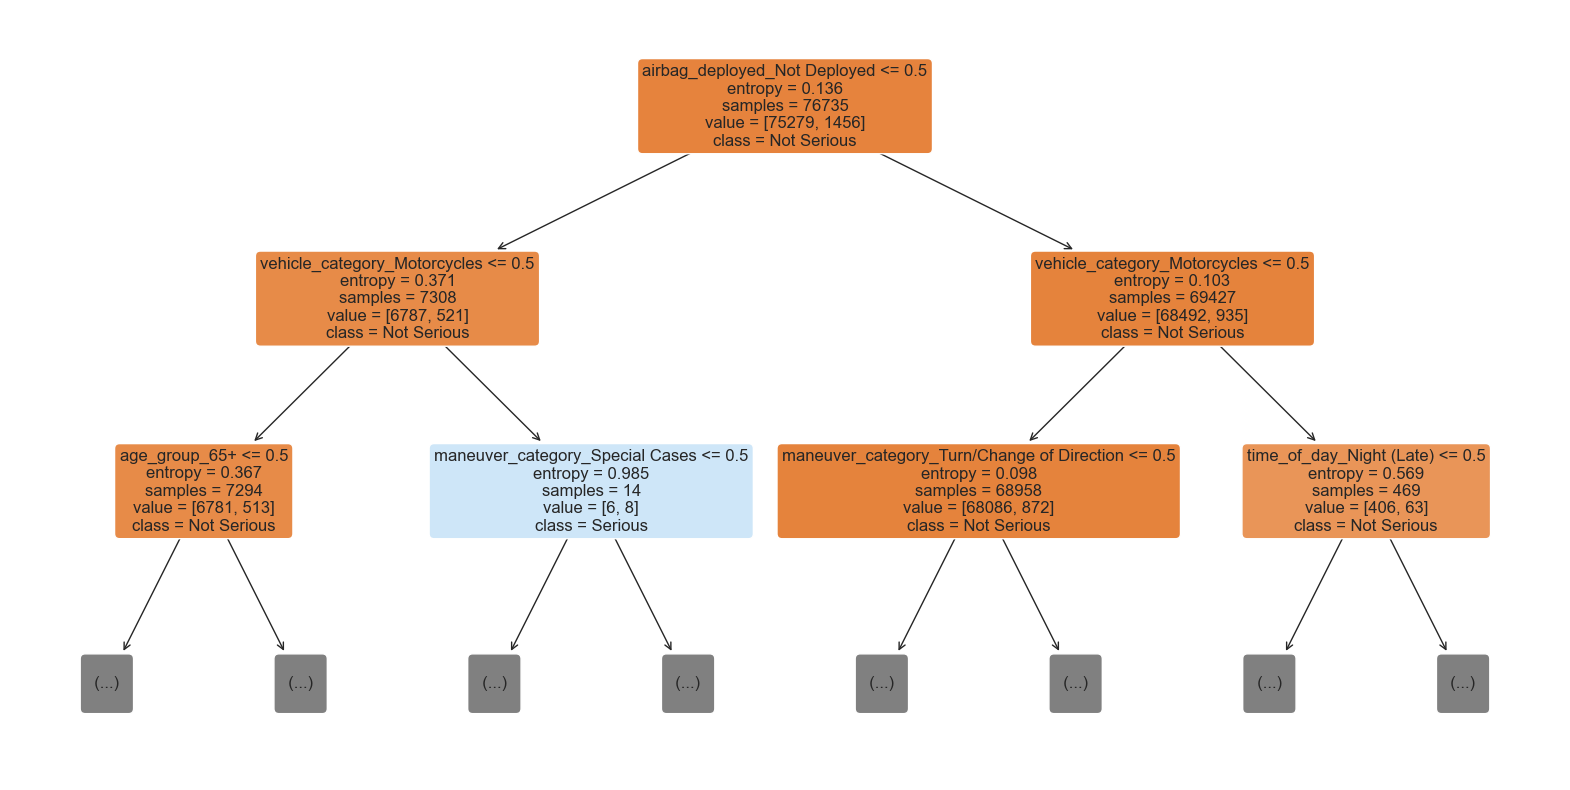

In [70]:
# plots decision tree diagram

# Combine categorical and numerical features
categorical_features = preprocessor.transformers_[0][1].get_feature_names_out()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
feature_names = np.concatenate([categorical_features, numerical_features])

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_final_model, 
          max_depth=2,  # Limit the depth of the plot (adjustable)
          filled=True, 
          feature_names=feature_names,  # Use directly extracted feature names
          class_names=['Not Serious', 'Serious'], 
          rounded=True, 
          fontsize=12)

plt.show()

## 7. <a name ="Conclusion"></a> Conclusion

### 7.1 <a name ="Limitations"></a> Limitations

1. **Data Quality: Police-Reported Data**


The quality of the model heavily depends on the data used, which in this case comes from police-reported records. There are two main issues with this:

   * **Potential Implicit Bias**: Police reports can be influenced by implicit bias, which may skew the results.

   * **Subjectivity and Delayed Reporting**: Police often arrive after a crash has occurred, meaning their reports are based on second-hand accounts and can be subjective. Additionally, individuals involved in the crash may not always provide accurate information.
    

2. **Decision Tree Interpretation**


While decision trees excel at identifying important features and ranking them by their contribution to the model, they do not provide a direct understanding of the magnitude or direction of a feature’s effect on the target variable. Unlike linear regression, where changes in a predictor can be interpreted as affecting the target in a specific way (e.g., increasing by a set amount), decision trees offer an ordinal ranking of features but don’t give us insights into how changes in those features quantitatively affect the target variable.

3. **Computing and Time Constraints**


Due to the quick turnaround time for this project, the focus was on delivering a deployable minimum viable product. As a result, some decisions made during the data cleaning and modeling phases, such as feature selection, model choice, and hyperparameter tuning, were constrained by time. More time could have allowed for more refined selections and optimizations.

### 7.2 <a name ="Recommendations"></a> Recommendations

### 1. **Male Trends Analysis**:
The analysis revealed that males were disproportionately represented in serious injury crashes, accounting for **54.4**% of serious injuries despite comprising **47.8**% of total injuries. However, it’s important to note that the data does not distinguish whether males were the drivers or passengers in these situations.

#### **Recommendations**:

***Further Analysis***: Conduct additional research to determine whether this trend persists when focusing specifically on male drivers.

***Targeted Safety Campaign***: If the trend is verified for male drivers, develop a targeted safety campaign aimed at addressing behaviors linked to higher risk, such as speeding and aggressive driving. This campaign could utilize public service announcements, social media outreach, and partnerships with local organizations to encourage safer driving habits.
    

### 2. **Vehicle Size and Speed Regulations**:
One of the key findings of this analysis is that airbag deployment (or lack thereof) is a key contributing factor in the injury severity of a crash. Airbags deploy based on the force of impact, which is significantly influenced by vehicle speed and size. Larger, heavier vehicles such as trucks and SUVs contribute to more severe crashes due to the greater forces involved, increasing the likelihood of airbag deployment.

#### **Recommendations**:

**City-Specific Weight Fees**: Introduce a tiered fee system for parking permits or vehicle registrations within Chicago, where heavier personal vehicles like trucks and SUVs incur higher fees. This financial disincentive could encourage the use of smaller, safer, and more environmentally friendly vehicles in city settings.


**Revenue Allocation**: Allocate revenue from these fees to fund pedestrian and cyclist safety initiatives, such as traffic calming measures, better signage, and crash prevention campaigns.


**Speed-Limiting Systems**: Advocate for regulations that require or incentivize the use of speed-limiting technology in vehicles. These systems can restrict maximum vehicle speeds to safer limits, reducing the likelihood and severity of crashes.

### 3. **Annual Airbag Inspections**:
Airbag deployment was identified as the most important feature in predicting injury severity, highlighting its importance in crash safety. To ensure airbags function effectively, especially in older vehicles, regular inspection and maintenance are crucial.

#### **Recommendation**:
Advocate for policies requiring annual airbag inspections, ensuring they are functional and compliant with modern safety standards.

### 7.3 <a name ="Next-Steps"></a> Next Steps

Based on the findings, speed—either directly or indirectly—appears to contribute to serious crashes. This raises the critical question: ***How do we encourage drivers to slow down?*** Addressing this behavior change is a complex challenge, and I’m eager to explore this further.

Additionally, I’m interested in delving into the overrepresentation of males in serious crashes. I plan to focus on male drivers specifically to ***see if this trend holds and, if so, explore the potential reasons for this disparity***.

## 8. <a name ="References"></a> References 

1. City of Philadelphia. (2024). *Vision Zero Annual Report 2024*. Philadelphia.gov. https://visionzerophl.com/plans-and-reports/annual-report-2024/


2. Chicago Department of Transportation (CDOT). (2024). *Chicago Annual Traffic Report 2024*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D


3. Vision Zero Network. (2024). *What is Vision Zero?* Vision Zero Network. https://visionzeronetwork.org/about/what-is-vision-zero/


4. Vision Zero Philadelphia. (n.d.). *Get involved*. Vision Zero Philadelphia. https://visionzerophl.com/get-involved/


5. Illinois Department of Transportation. (2024). *Illinois fatal crash data: 2024 snapshot*. Illinois Department of Transportation. https://apps.dot.illinois.gov/FatalCrash/snapshot.html


6. City of Chicago. (2017). *Vision Zero Action Plan 2017-2019*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D